In [1]:
import matplotlib.pyplot as mp
%matplotlib inline
import numpy as np
import sys
sys.path.insert(0, '/Volumes/Annie/CRRP/python/CRRP-photometry/')
sys.path.insert(0, '/Volumes/Annie/CRRP/python/Light-Curve-Fitting/')
import lcv_fitting
import lcv_fitting1
import coordinates
import optical
import lightcurves
import os
import glob
import re

In [2]:
targets = ['NGC3201', 'NGC7078', 'NGC5904', 'NGC6402']
cluster_RAs = ['10:17:36.82', '21:29:58.33', '15:18:33.22', '17:37:36.10']
cluster_DECs = ['-46:24:44.9', '12:10:01.2', '02:04:51.7', '-03:14:45.3']
data_dir = '/Volumes/Annie/CRRP/'
optical_dir = '/Volumes/Annie/CRRP/OpticalCatalogs/'


## Make lcv file with all data

In [4]:
targets2=['NGC6121']
data_dir = '/Volumes/Annie/CRRP/Photometry-only/'
for target in targets2: 
    print target
    candidates = np.loadtxt(data_dir+target+'/candidate-vars.txt', dtype='a10', usecols=(0))
    print len(candidates)
    for lcv in candidates:
    
        optical_lcv = data_dir+target+'/lcvs/optical/'+target+lcv+'.lcv'
        nir_lcv = data_dir+target+'/lcvs/nir/'+target+'ir'+lcv+'.lcv'
        mir_lcv = data_dir+target+'/lcvs/mir/'+lcv+'.lcv'
        save_dir = '/Volumes/Annie/CRRP/cluster-lcvs/'
        if (os.path.isfile(optical_lcv)) or (os.path.isfile(mir_lcv)):
            f = open(save_dir+target+'_'+lcv+'.lcv', 'w')
            if os.path.isfile(optical_lcv):
                optical_data = lightcurves.read_optical_lcv(optical_lcv, old=1)
                data_save = np.array(zip(optical_data['filter'], optical_data['day'], optical_data['mag'], 
                                optical_data['err']), dtype=[('c1', 'a2'), ('c2', float), ('c4', float), 
                                ('c5', float)])
                np.savetxt(f, data_save, fmt='%s %10.4f %6.3f %5.3f')
            if os.path.isfile(nir_lcv):
                nir_data = lightcurves.read_nir_lcv(nir_lcv, old=1)
                data_save = np.array(zip(nir_data['filter'], nir_data['day'], nir_data['mag'], 
                                nir_data['err']), dtype=[('c1', 'a2'), ('c2', float), ('c4', float), 
                                ('c5', float)])
                np.savetxt(f, data_save, fmt='%s %10.4f %6.3f %5.3f')
            if os.path.isfile(mir_lcv):
                mir_data = lightcurves.read_mir_lcv(mir_lcv)
                data_save = np.array(zip(mir_data['filter'], mir_data['mjd'], mir_data['mag'], 
                                mir_data['err']), dtype=[('c1', 'a2'), ('c2', float), ('c4', float), 
                                ('c5', float)])
                np.savetxt(f, data_save, fmt='%s %10.4f %6.3f %5.3f')
            f.close()
    

NGC6121
98


## Check variable index to identify RRL

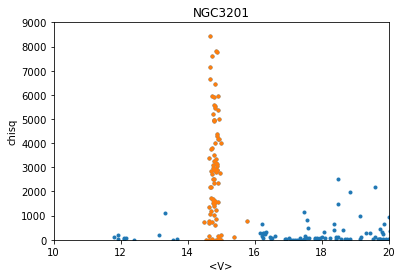

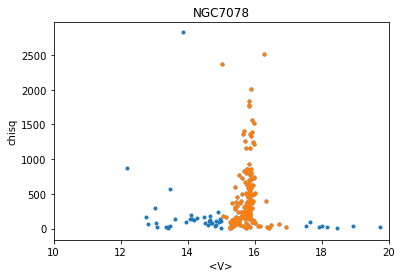

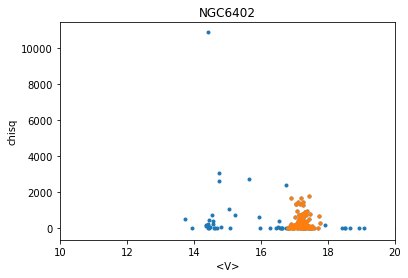

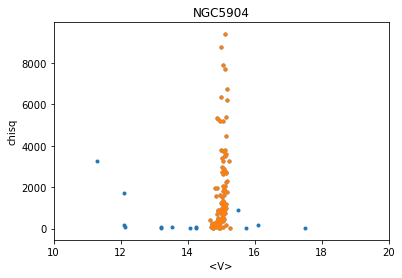

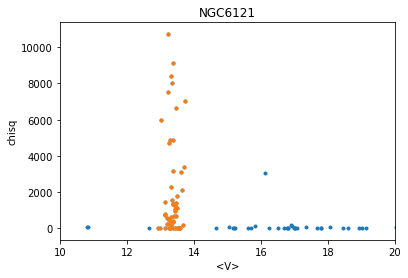

In [4]:
targets = ['NGC3201', 'NGC7078', 'NGC6402', 'NGC5904', 'NGC6121']
bright = [14, 15, 16.8, 14.5, 12.8]
faint = [16, 17, 17.8, 15.5, 13.8]
RRL_candidates = []
save_dir = '/Volumes/Annie/CRRP/cluster-lcvs/'
for ind, target in enumerate(targets):
    candidates = glob.glob(save_dir+target+'*.lcv')
    star_names = np.zeros(len(candidates), dtype='a30')
    chisq = np.zeros(len(candidates))
    mean_v = np.zeros(len(candidates))
    for star, candidate in enumerate(candidates):
        temp = candidate.split('/')
        star_names[star] = temp[-1]
        filters, data = lcv_fitting.read_lcv(candidate)
        b_mags = data['mag'][data['filter'] == 'B']
        v_mags = data['mag'][data['filter'] == 'V']
        b_errs = data['err'][data['filter'] == 'B']
        v_errs = data['err'][data['filter'] == 'V'] 
        Nb = float(len(b_mags))
        Nv = float(len(v_mags))
        if (Nb > 10) & (Nv > 10):
            b_sum = np.sum((b_mags - np.mean(b_mags))**2/b_errs**2)
            v_sum = np.sum((v_mags - np.mean(v_mags))**2/v_errs**2)
            chisq[star] = 1/(Nb + Nv) * (b_sum + v_sum)
            mean_v[star] = np.mean(v_mags)
    mp.scatter(mean_v, chisq, marker='.')
    RRL = (mean_v > bright[ind]) & (mean_v < faint[ind])
    RRL_candidates = np.append(RRL_candidates, star_names[RRL])
    mp.scatter(mean_v[RRL], chisq[RRL], marker='.')
    if target == 'NGC3201': mp.ylim(0,9000)
    mp.title(target)
    mp.ylabel('chisq')
    mp.xlabel('<V>')
    mp.xlim(10,20)
    mp.show()

# save RRL candidates to file
np.savetxt(save_dir+'RRL-candidates.txt', RRL_candidates, fmt='%s')
#print RRL_candidates

In [3]:
list_position = 0
filters_all = np.array(['U', 'B', 'V', 'R', 'I', 'J', 'H', 'K', 'I1', 'I2'], dtype='S2')

In [9]:
period_file.close()
avg_file.close()

166 RRL candidates.
NGC7078_A16181 0.992135623464 0.992119 51046.0416
NGC7078_A19407 0.497759754186 0.4977484 56836.244
NGC7078_A23493 0.993314233498 0.993309 50989.1486
NGC7078_A33730 0.993328469496 0.9932609 52105.0448
NGC7078_A49918 0.274169807442 0.27416762 52109.9625
NGC7078_A59109 0.999448243318 0.999526 57538.2025
NGC7078_A62286 0.971009063231 0.9709569 52105.0199
NGC7078_A63429 0.498057760282 0.4980573 53109.4023
NGC7078_NV11 0.417536925741 0.4175384 52109.0465
NGC7078_NV6 0.390881713944 0.3908832 52107.0141
NGC7078_V1 0.587573539588 0.5875745 55323.4425
NGC7078_V10 0.386388503716 0.386388 52106.9852
NGC7078_V100=NV12 0.405711432271 0.4057113 52104.0094
NGC7078_V101 0.400298466901 0.4002937 55494.2752
NGC7078_V102=NV10 0.759434709194 0.7594298 55323.3653
NGC7078_V109=NV14 0.230899871759 0.23089978 52105.9814
NGC7078_V11 0.343235279224 0.343236 52104.9505
NGC7078_V110 0.999716810375 0.9996339 52109.943
NGC7078_V111 0.682781235643 0.6826952 52109.9921
NGC7078_V115=V163 0.35554853

/Users/Jill/anaconda2/lib/python2.7/site-packages/astropy/stats/sigma_clipping.py:158: RuntimeWarning: invalid value encountered in greater
  _filtered_data.mask |= _filtered_data > max_value
/Users/Jill/anaconda2/lib/python2.7/site-packages/astropy/stats/sigma_clipping.py:159: RuntimeWarning: invalid value encountered in less
  _filtered_data.mask |= _filtered_data < min_value


NGC7078_V129 0.683119758962 0.6831214 51747.1538
NGC7078_V13 0.574898537326 0.5749054 52104.8897
NGC7078_V130 0.638717710106 0.6386363 52109.9357
NGC7078_V139=ZK44 0.987655019125 0.9877276 47777.4965
NGC7078_V14 0.38200771864 0.3820057 51701.5275
NGC7078_V143 0.505844615688 0.5058397 57538.2038
NGC7078_V149 0.505371022309 0.5053722 48068.1961
NGC7078_V150 0.977755941094 0.9777737 57538.2015
NGC7078_V155=V176 0.500337646567 0.5003202 55795.0483
NGC7078_V16 0.399218685186 0.3992163 52104.0123
NGC7078_V166=ZK22 0.589680078663 0.5897609 52106.9904
NGC7078_V17 0.428909724292 0.4289097 55324.3903
NGC7078_V173=ZK11 0.376855835804 0.3768547 52104.9521
NGC7078_V175=ZK6 0.735121557822 0.7351145 51752.2908
NGC7078_V18 0.367734201077 0.3677351 52109.8883
NGC7078_V181=ZK14 0.223507260175 0.22360628 52106.9692
NGC7078_V19 0.572317897524 0.5723143 55323.3772
NGC7078_V2 0.405131188303 0.4051356 52105.9455
NGC7078_V20 0.69694329469 0.696948 52109.9902
NGC7078_V21 0.648784384716 0.6487884 52107.0524
NGC

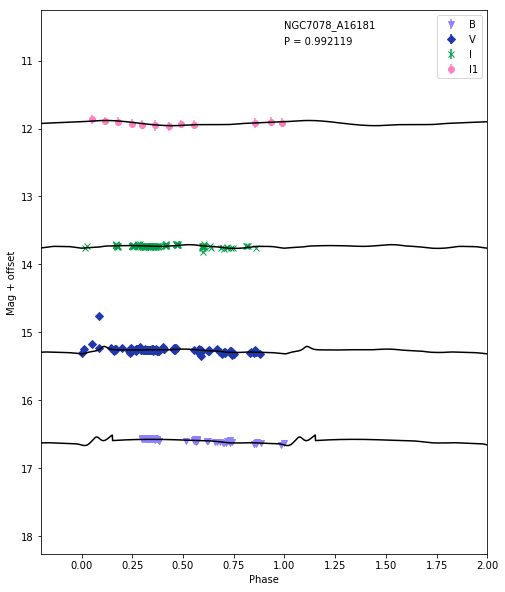

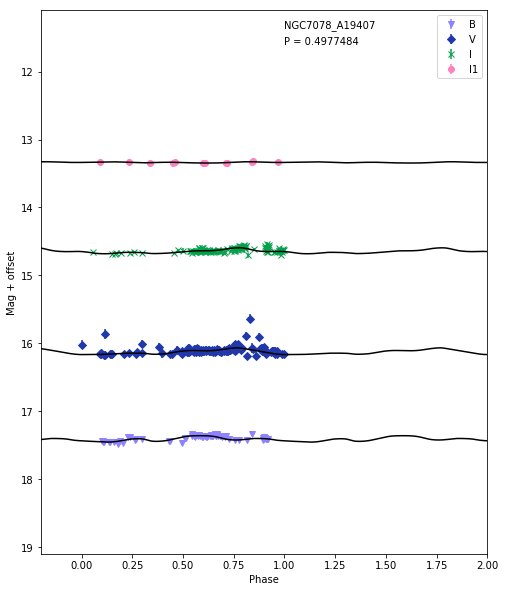

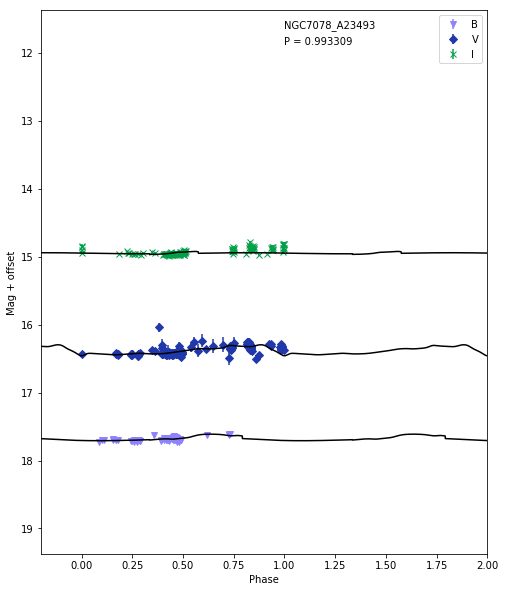

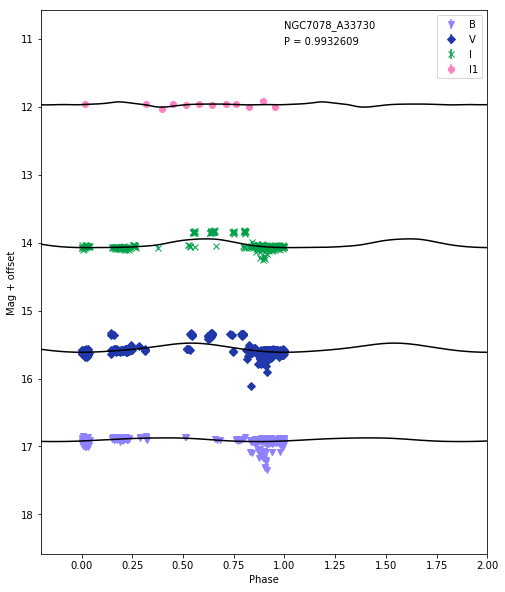

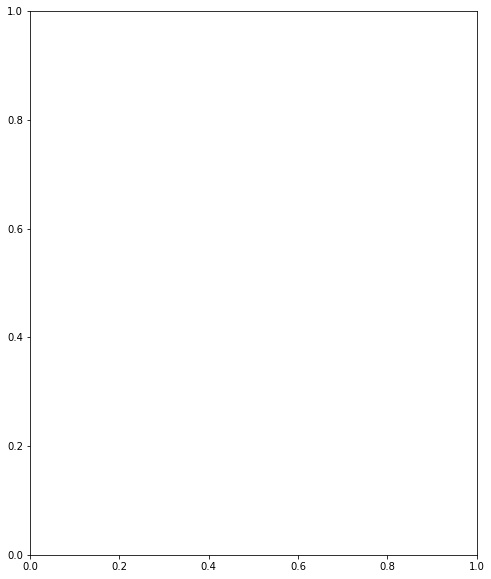

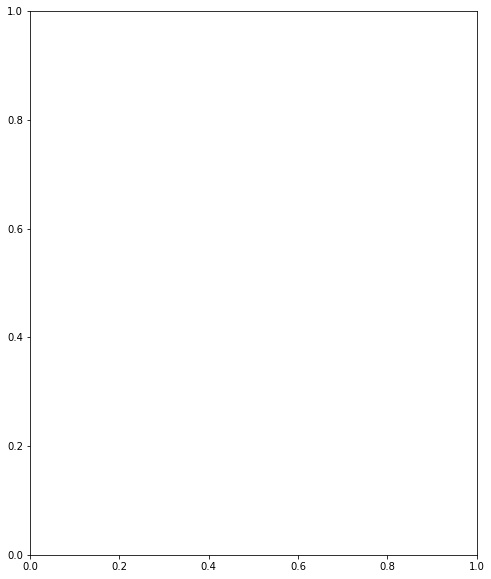

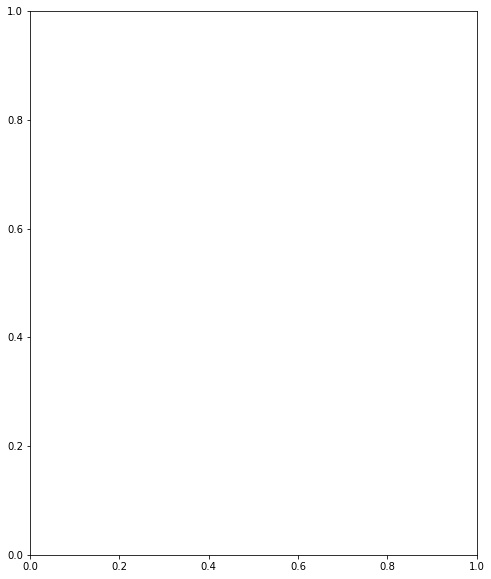

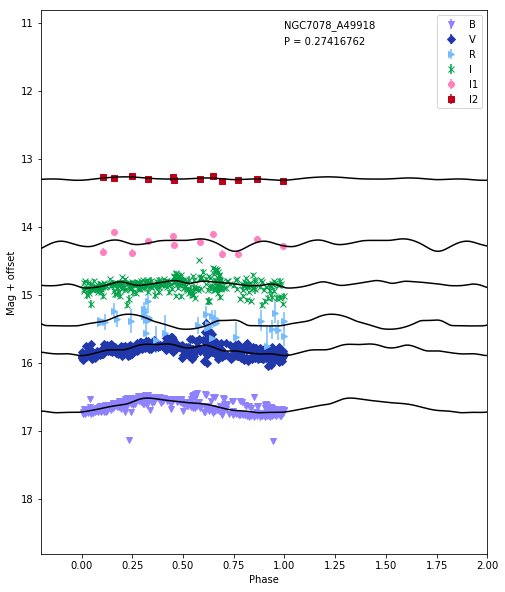

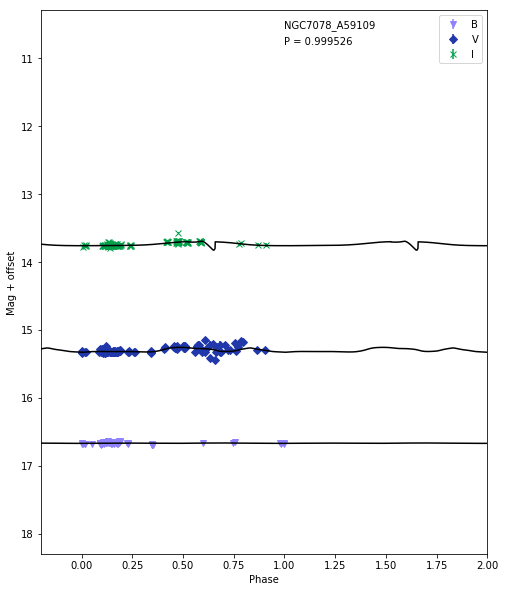

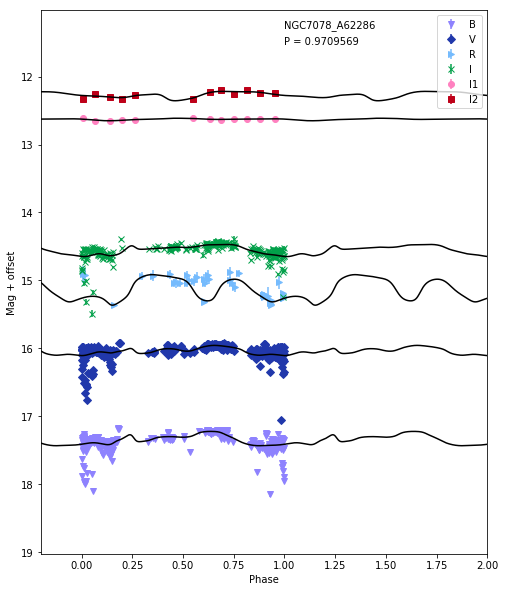

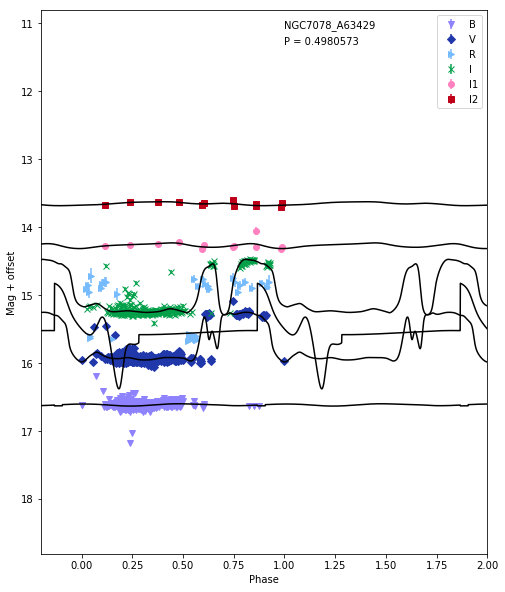

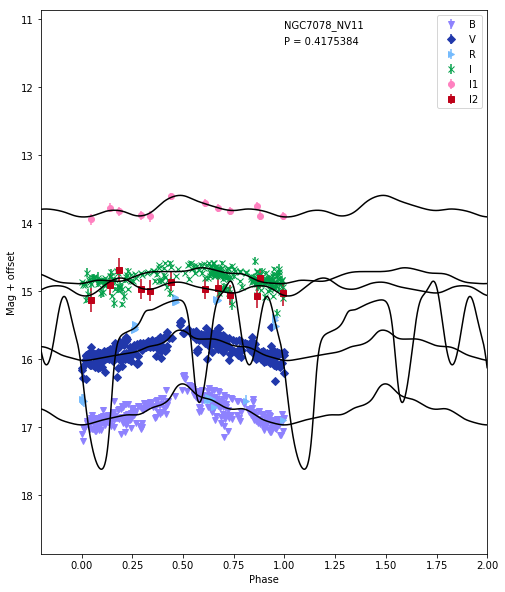

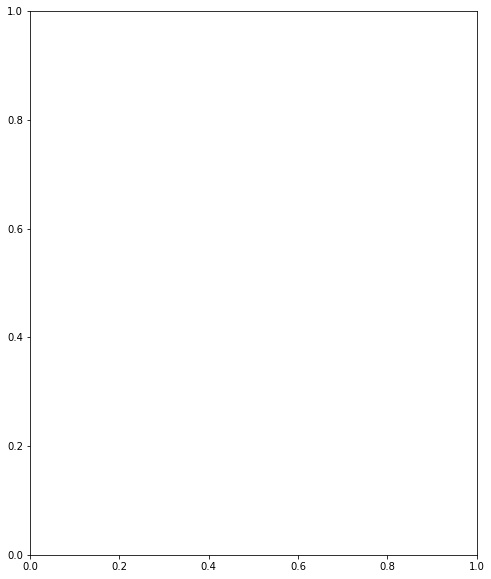

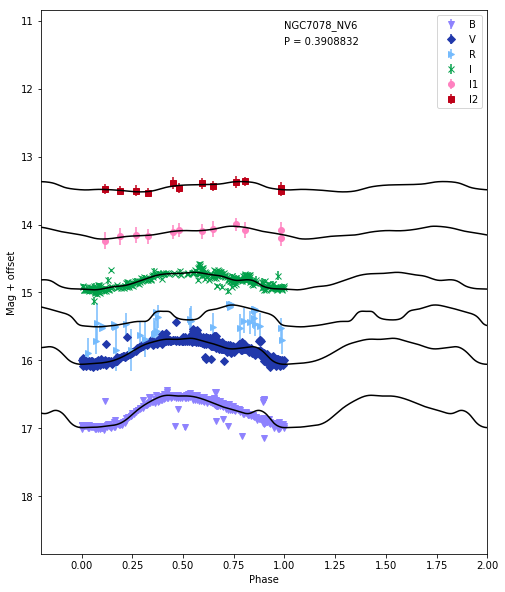

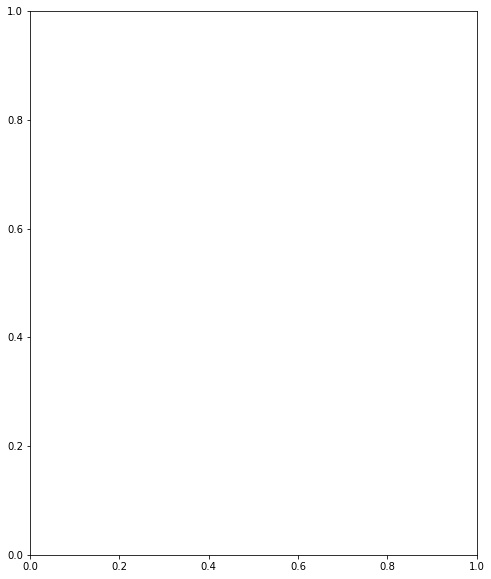

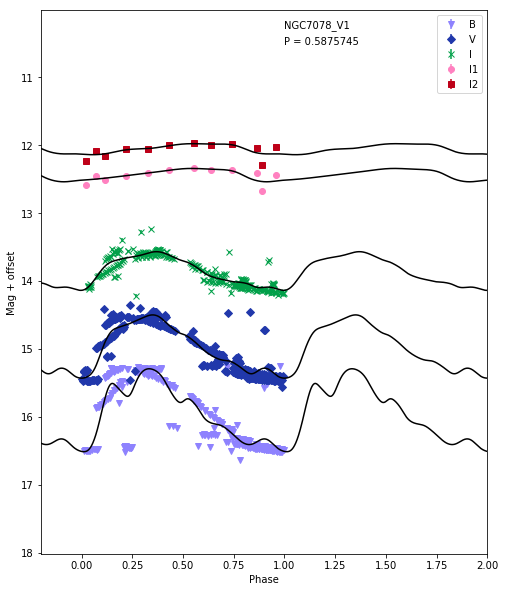

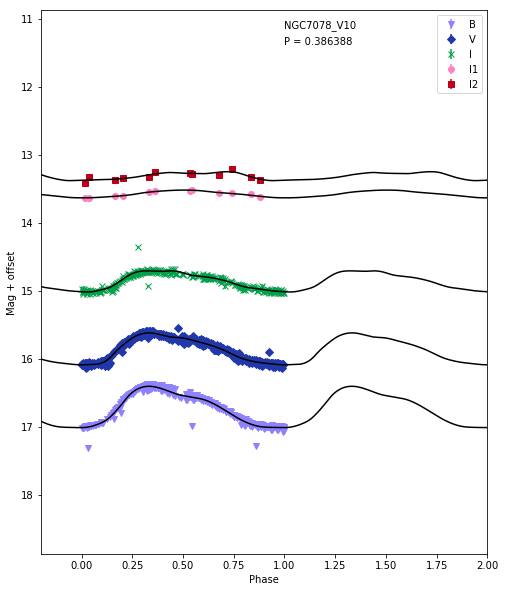

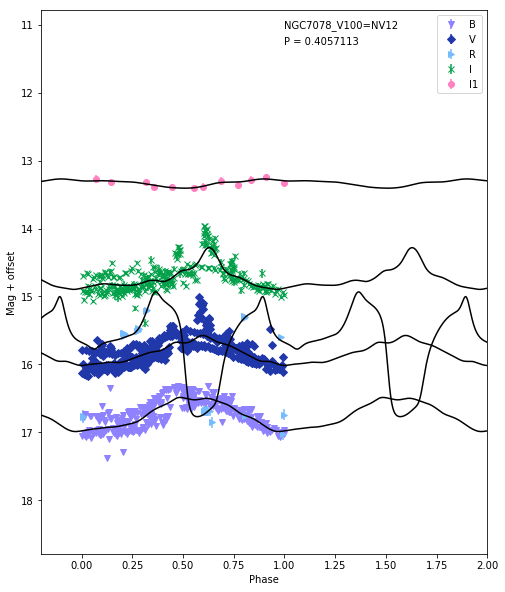

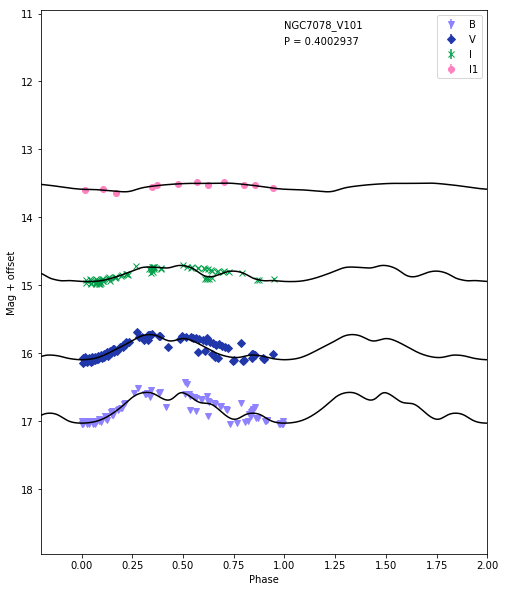

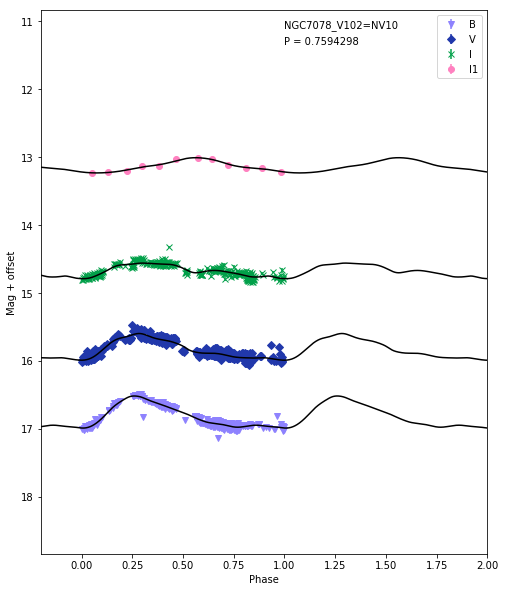

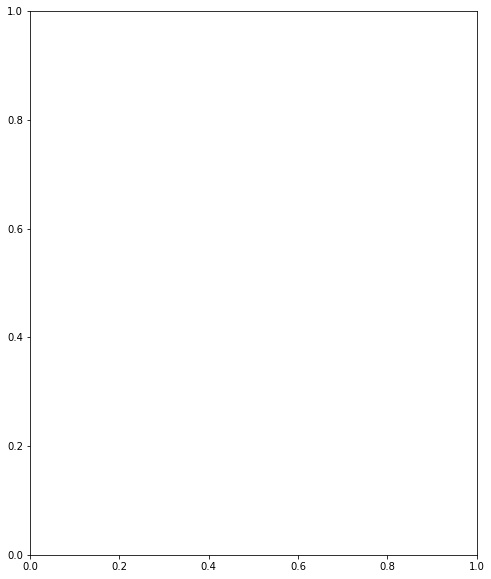

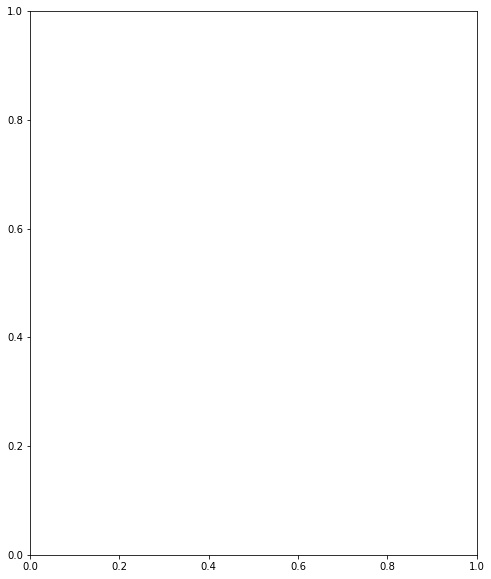

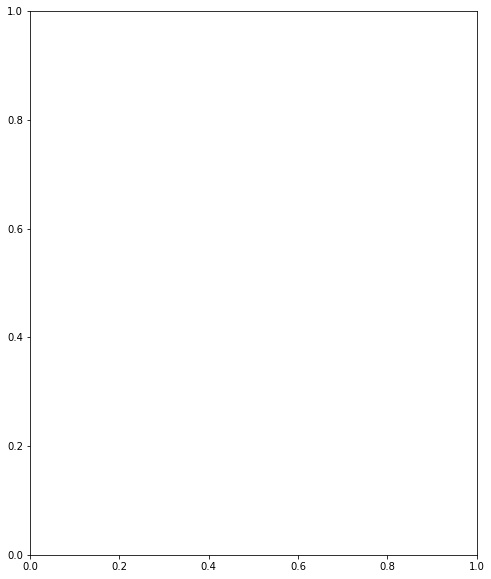

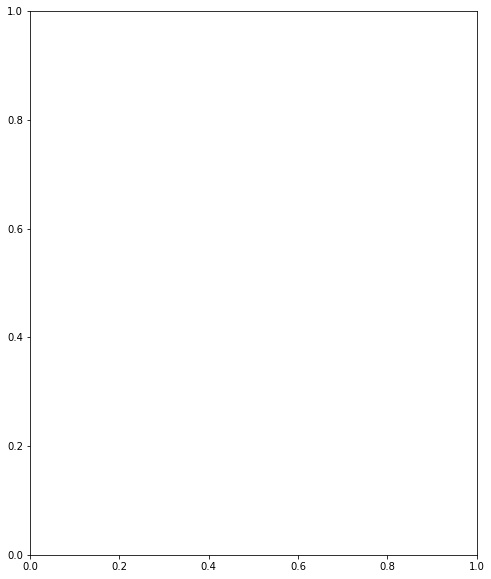

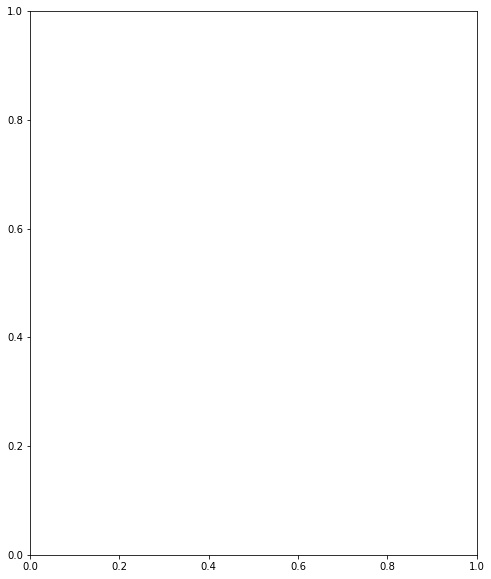

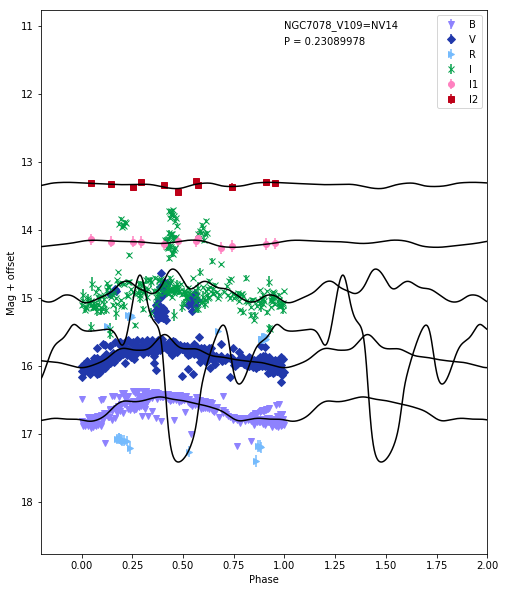

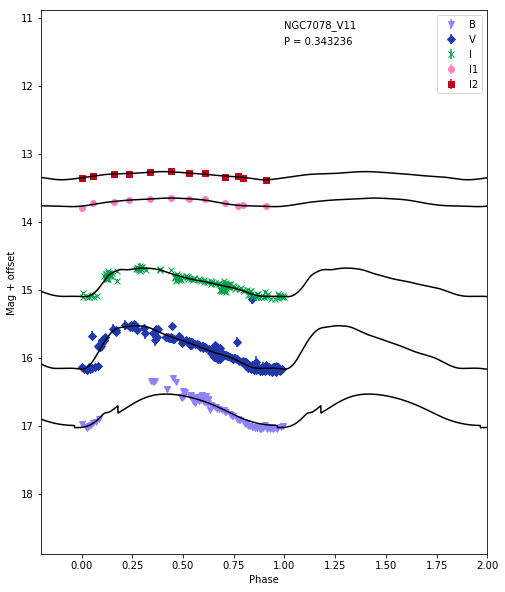

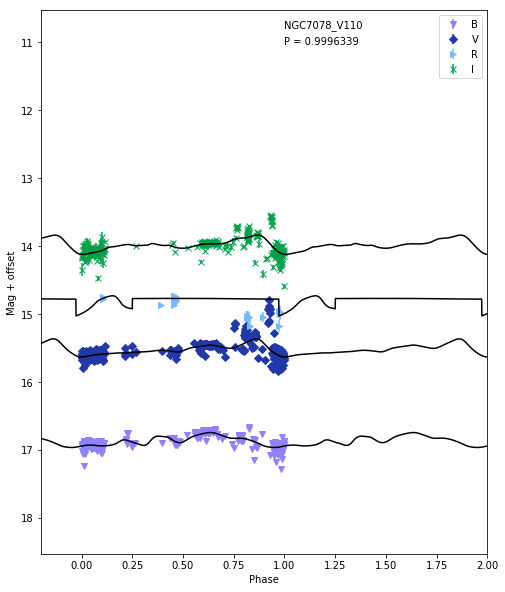

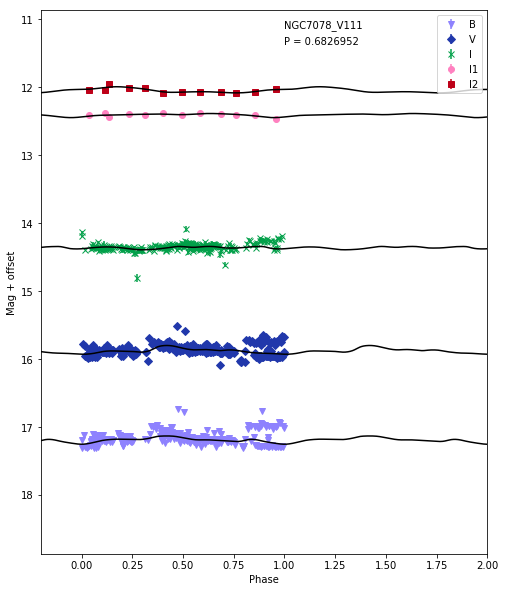

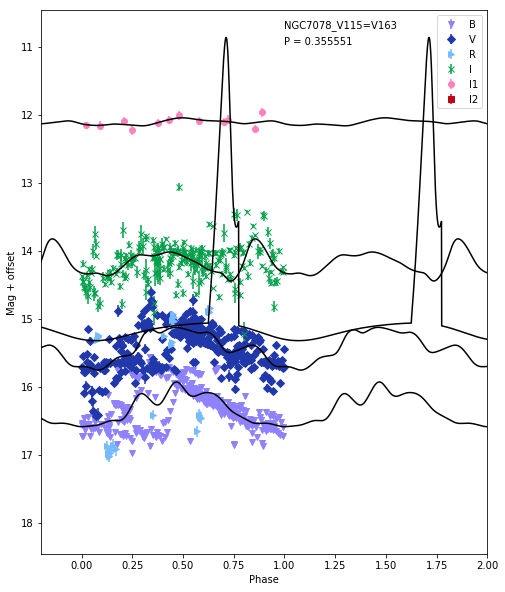

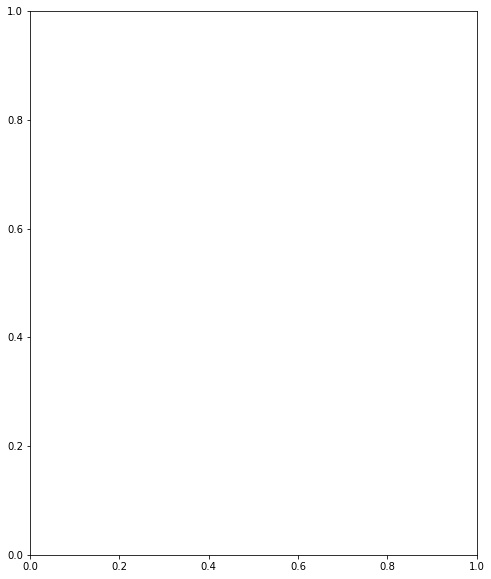

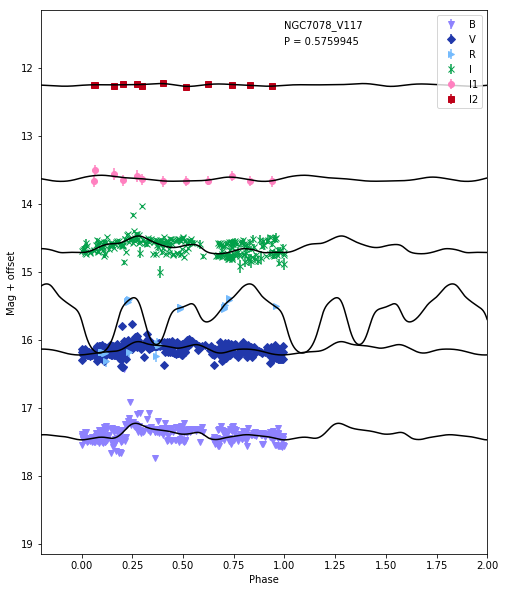

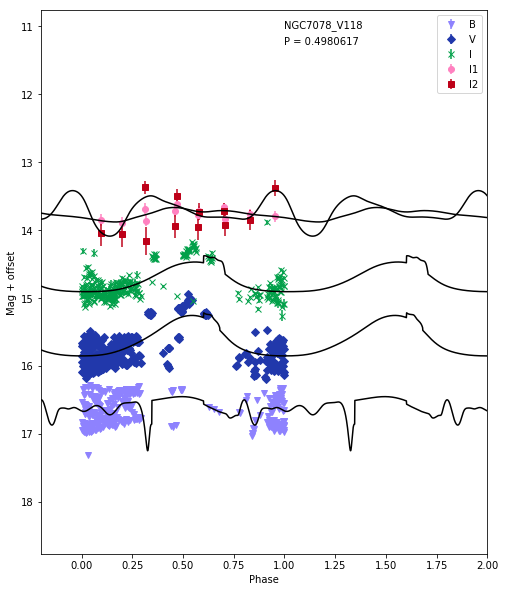

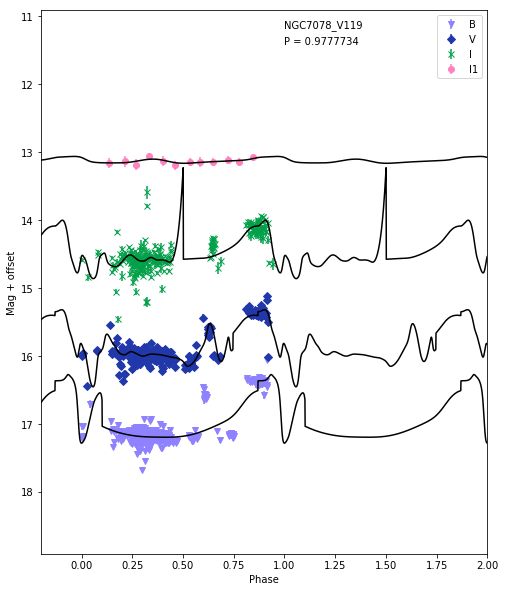

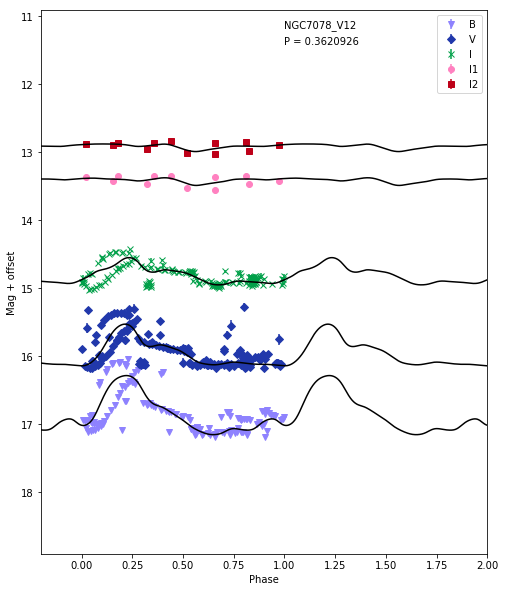

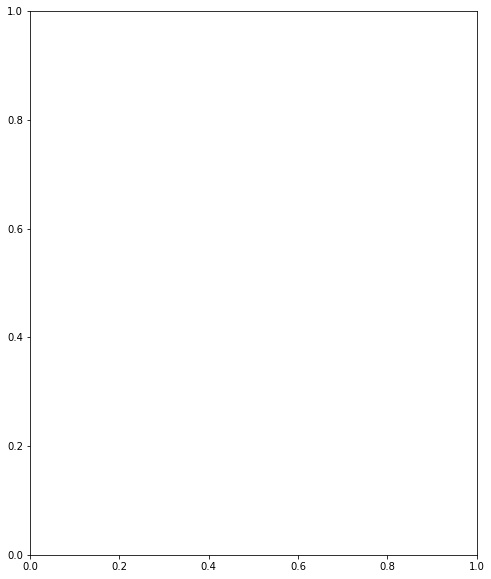

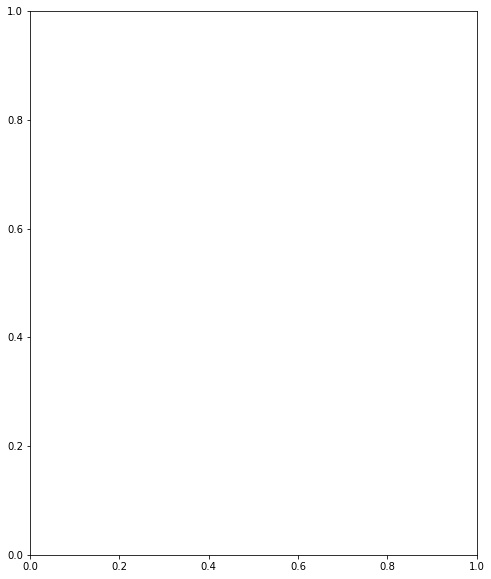

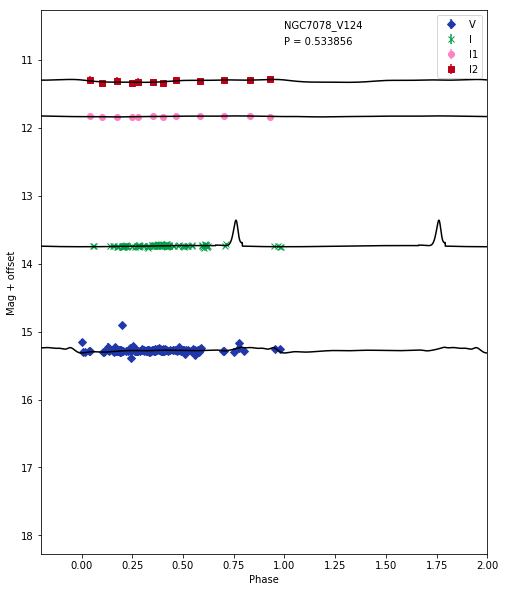

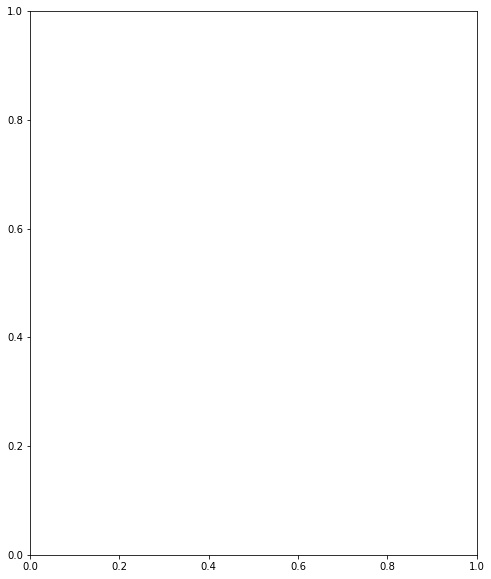

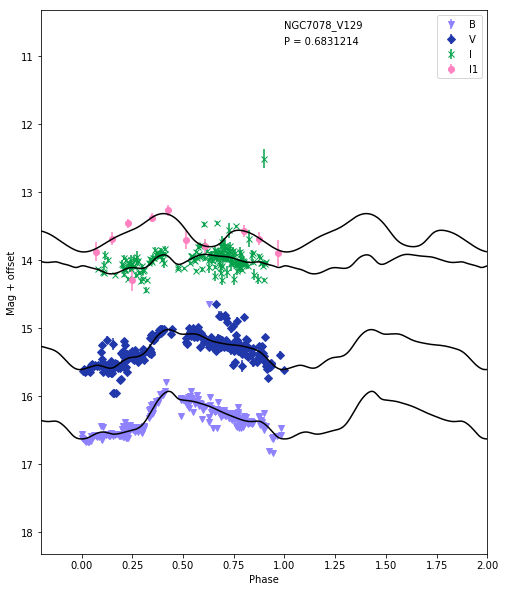

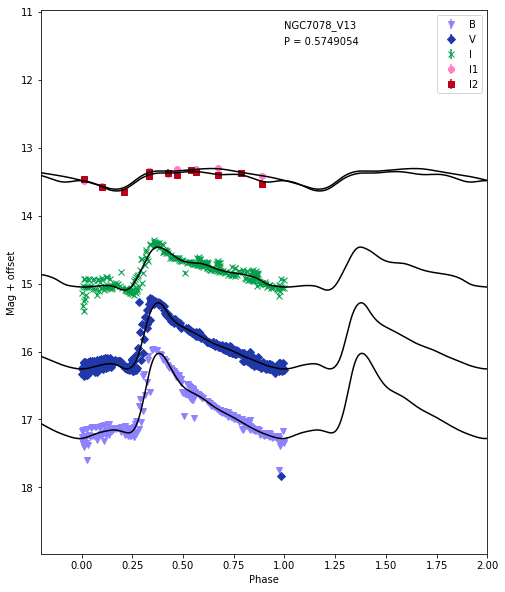

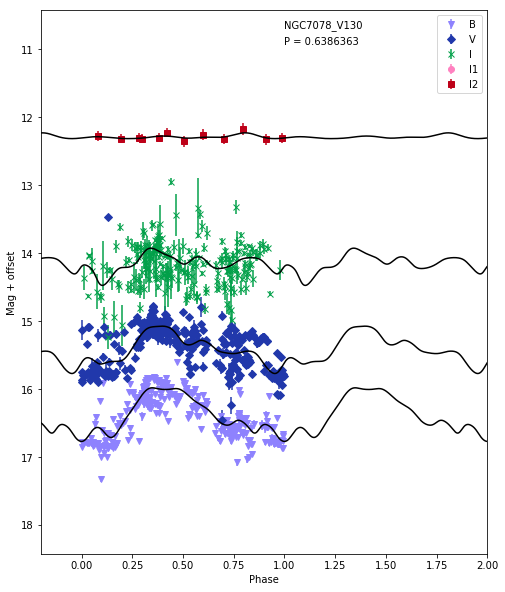

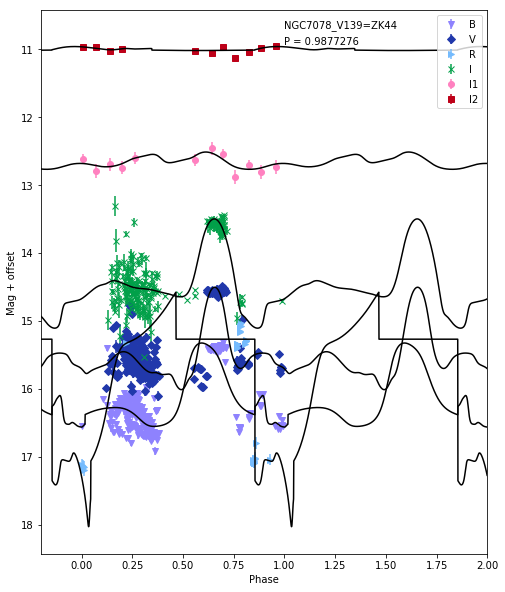

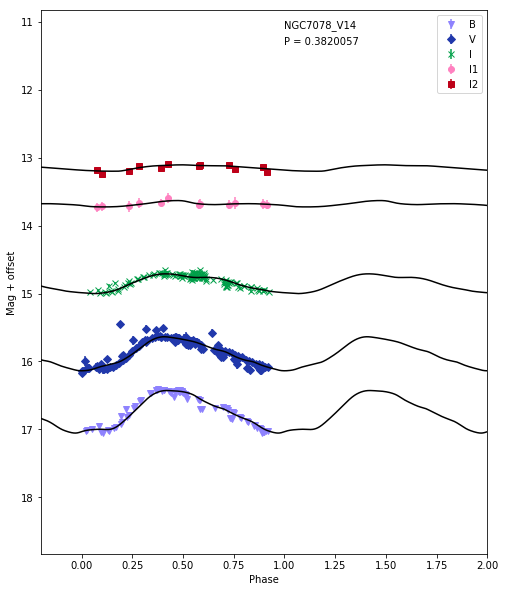

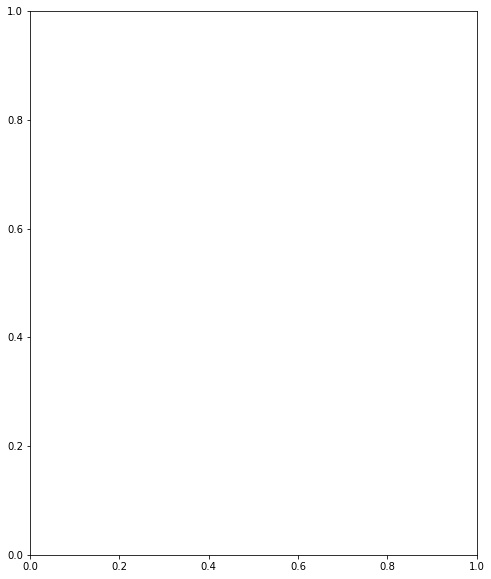

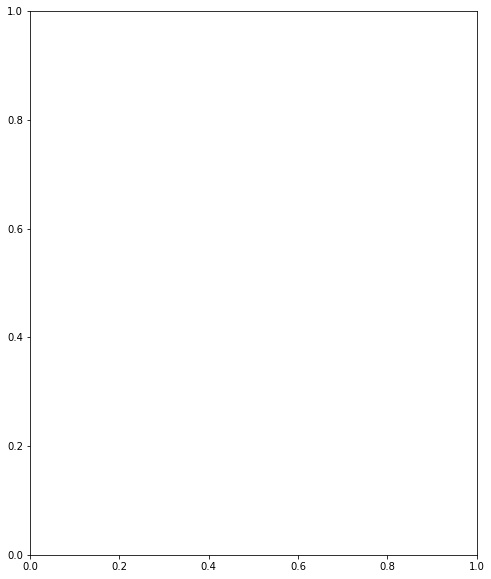

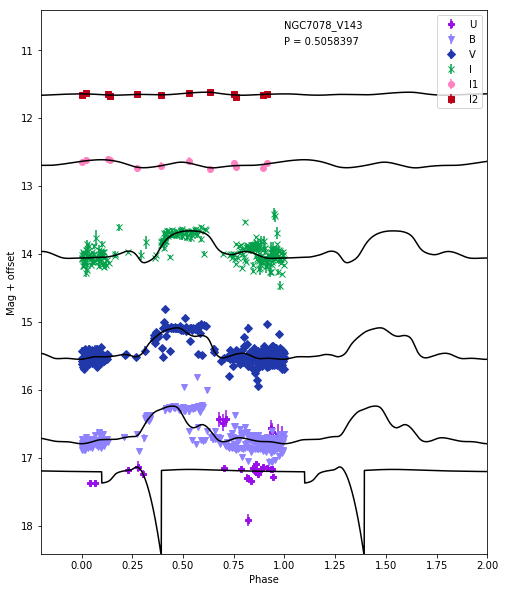

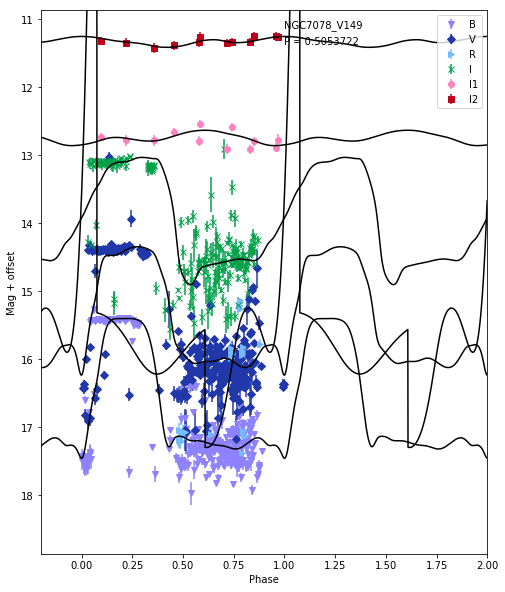

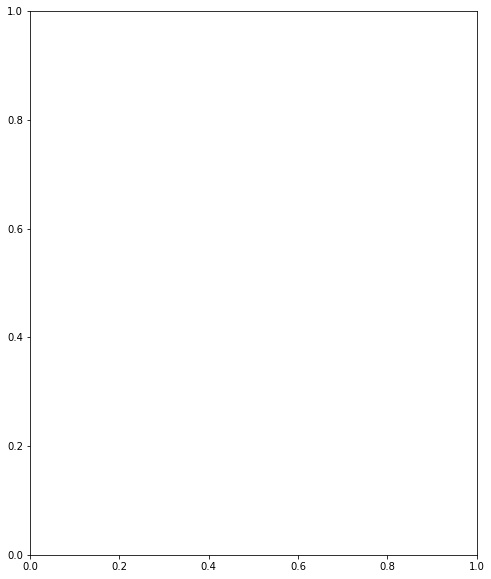

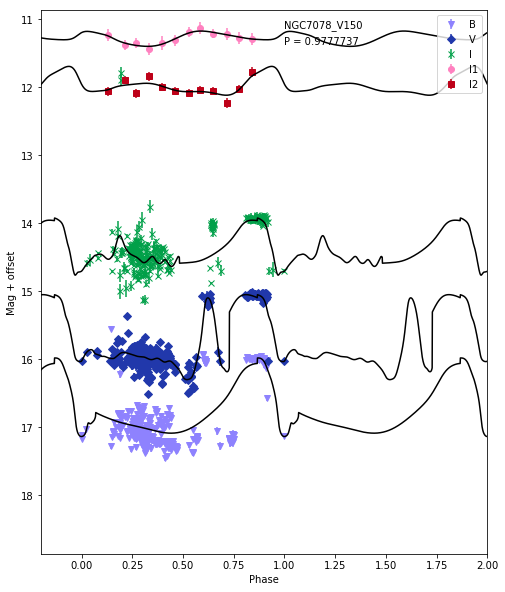

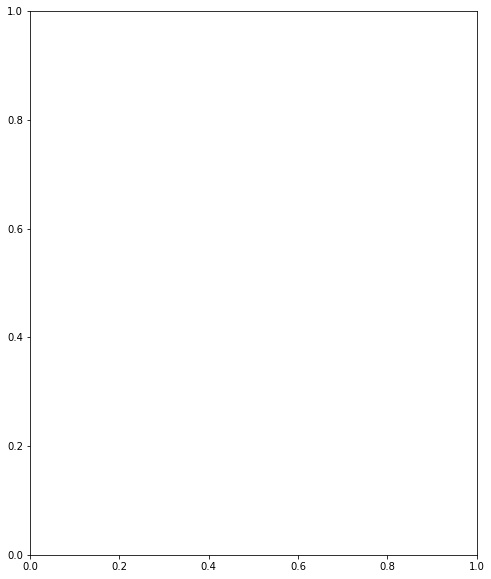

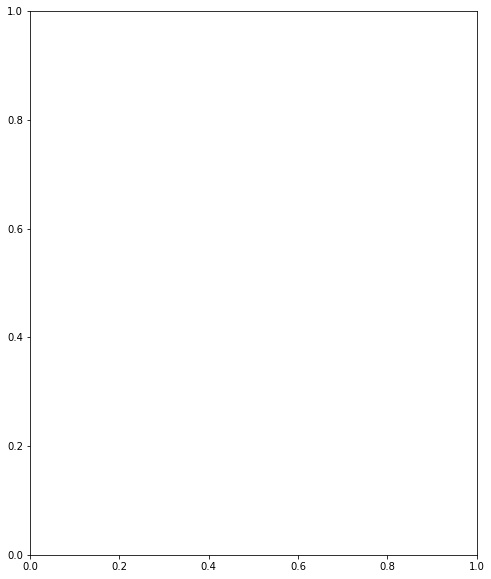

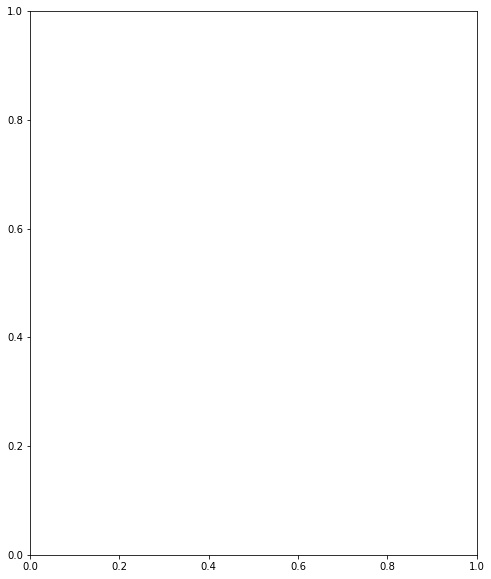

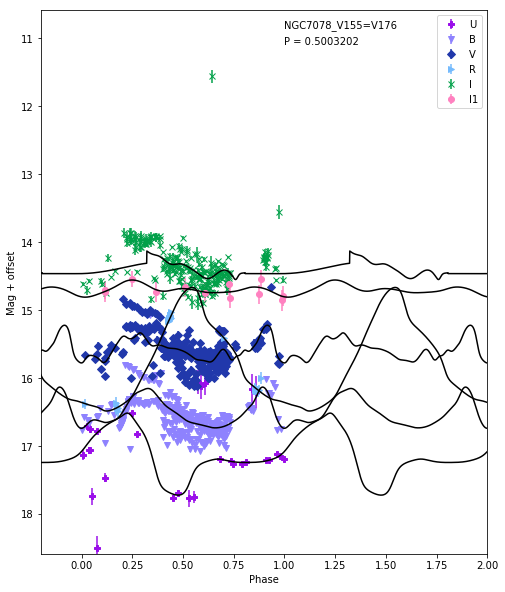

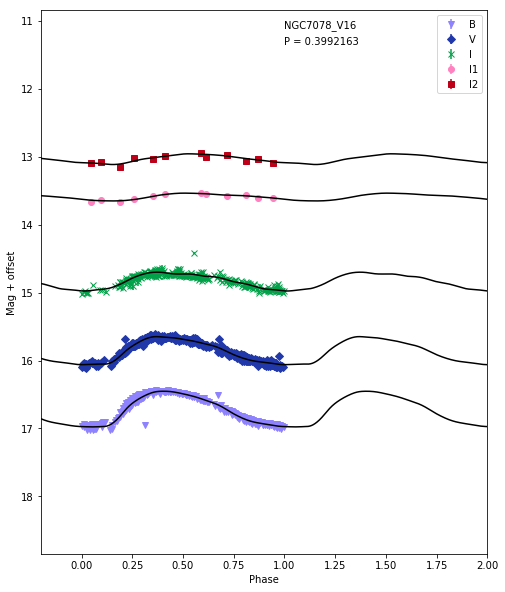

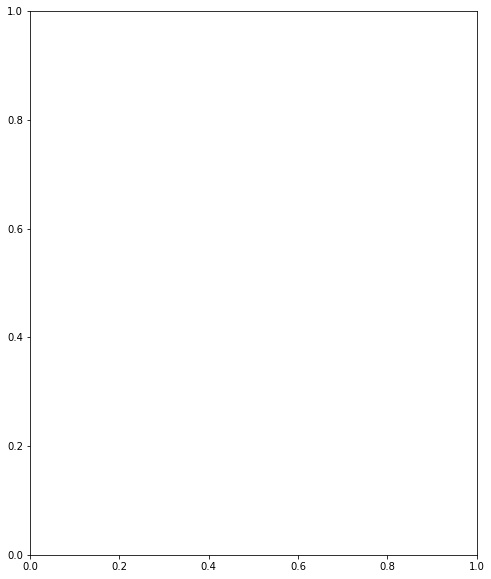

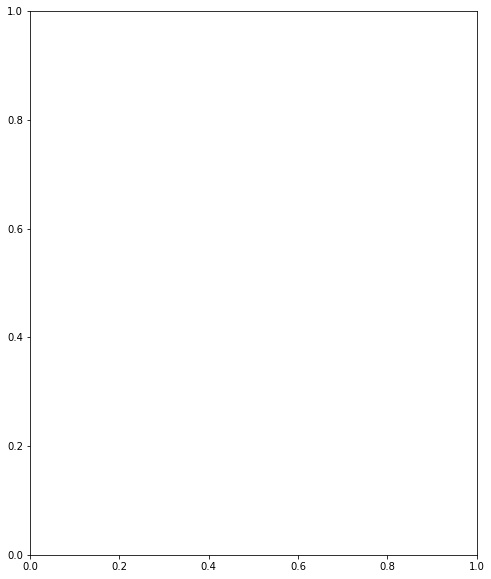

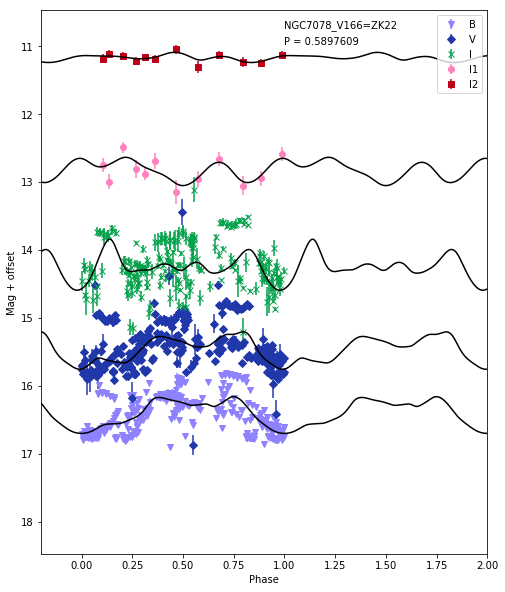

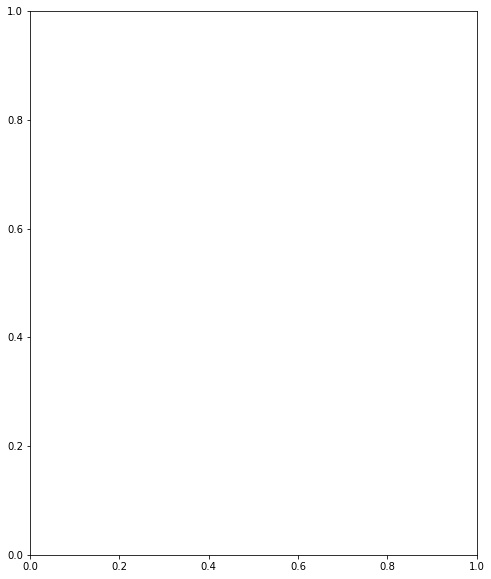

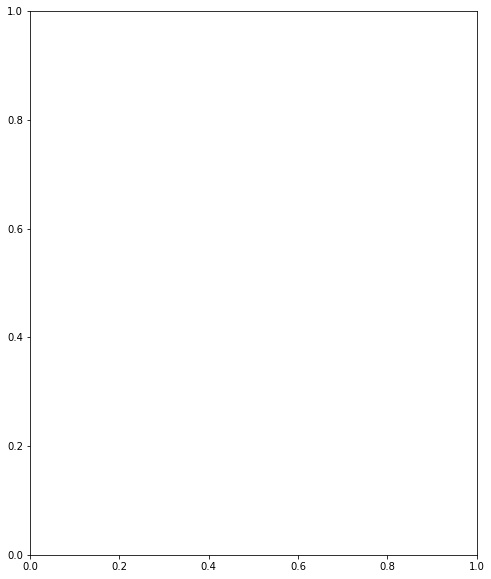

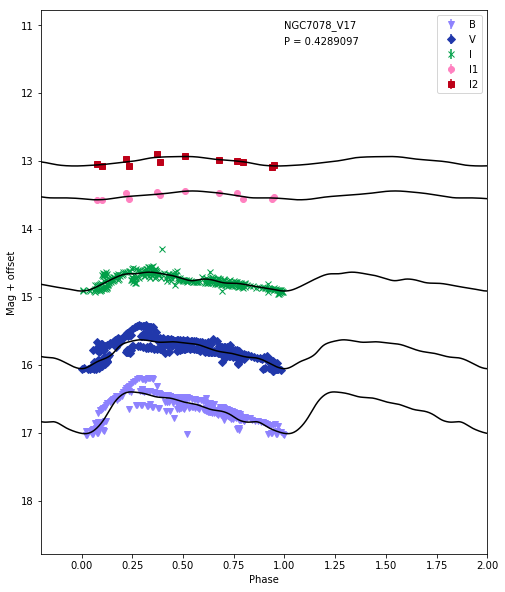

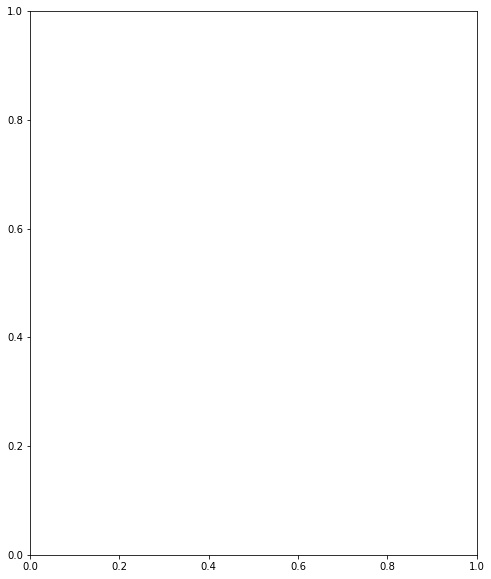

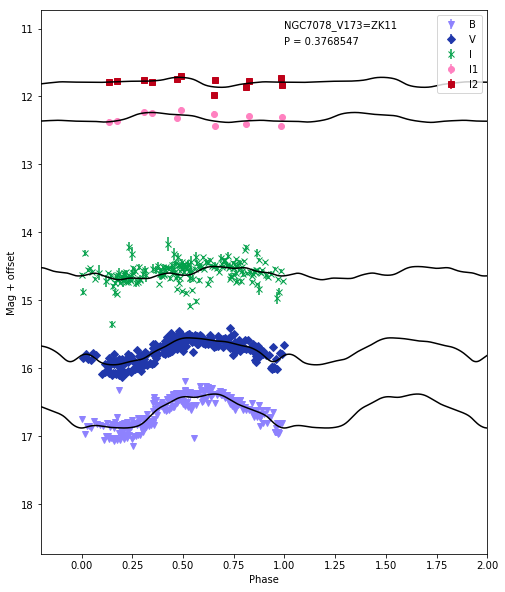

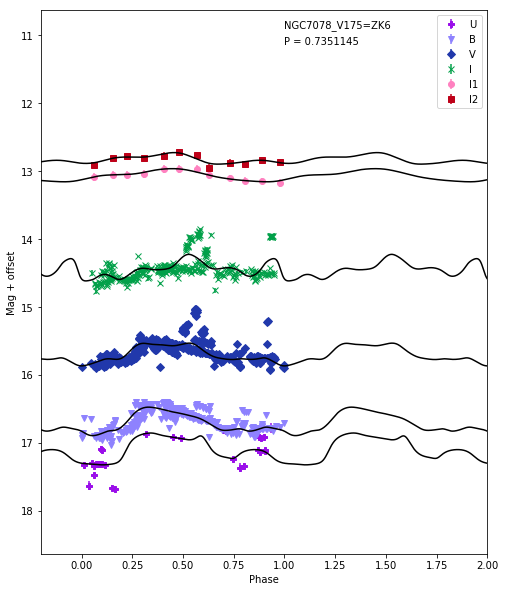

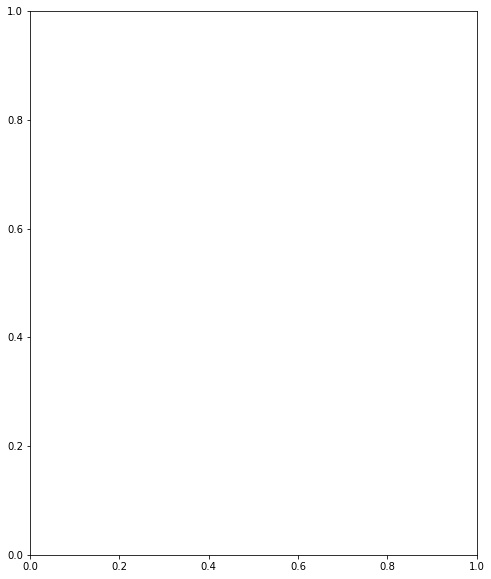

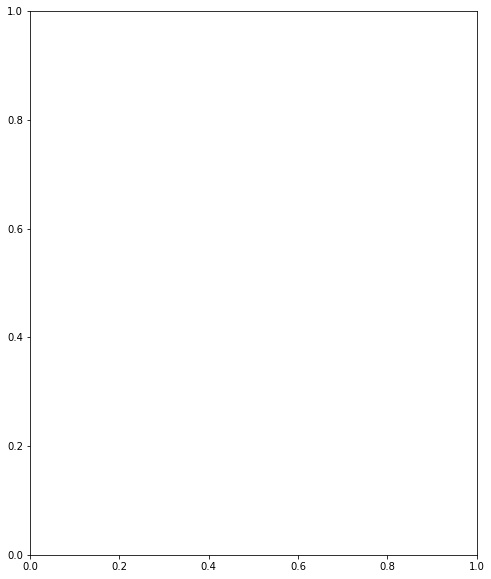

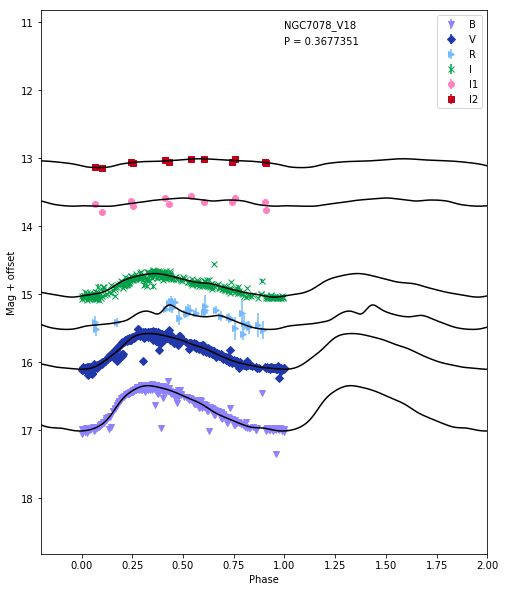

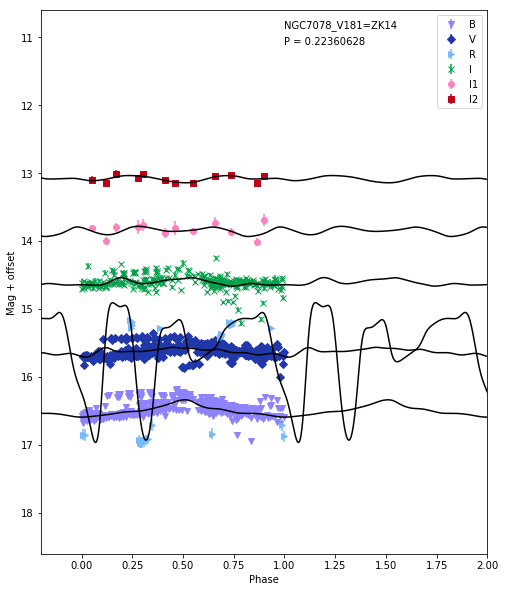

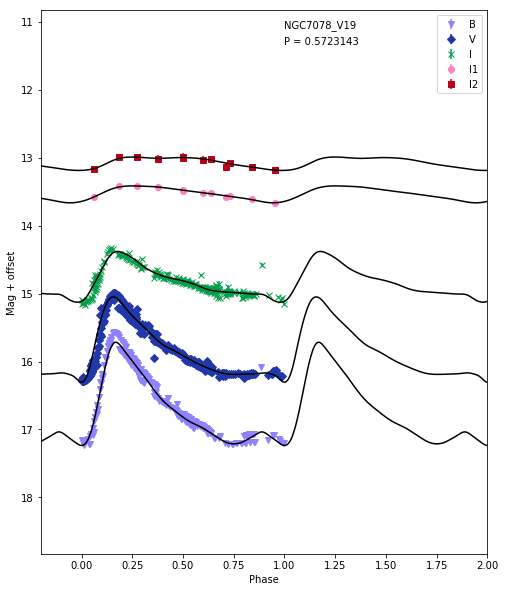

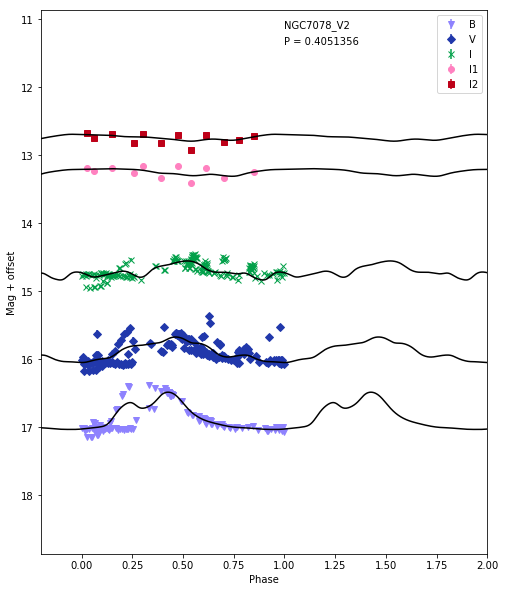

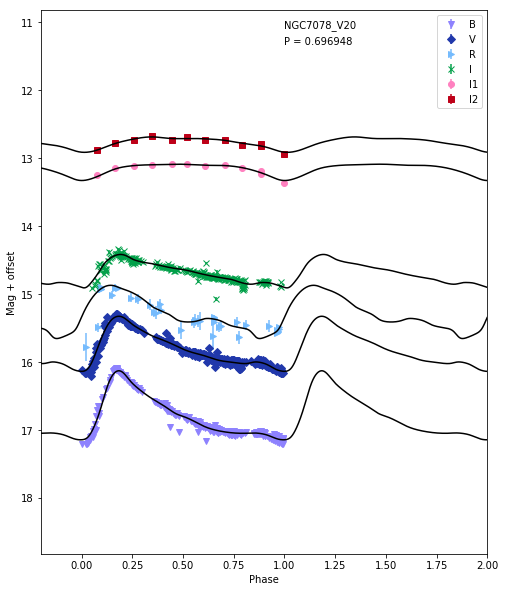

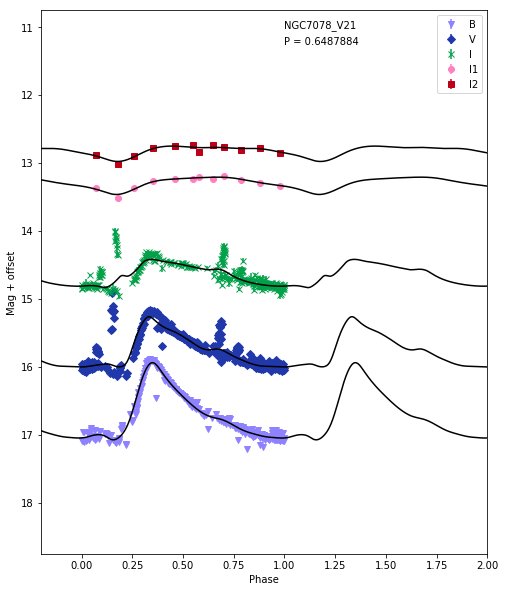

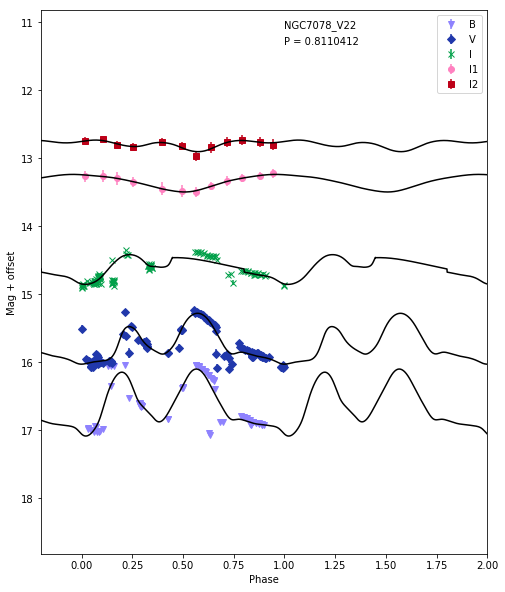

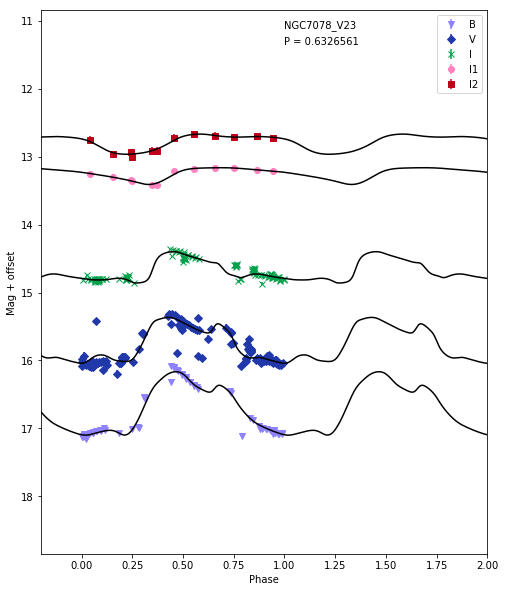

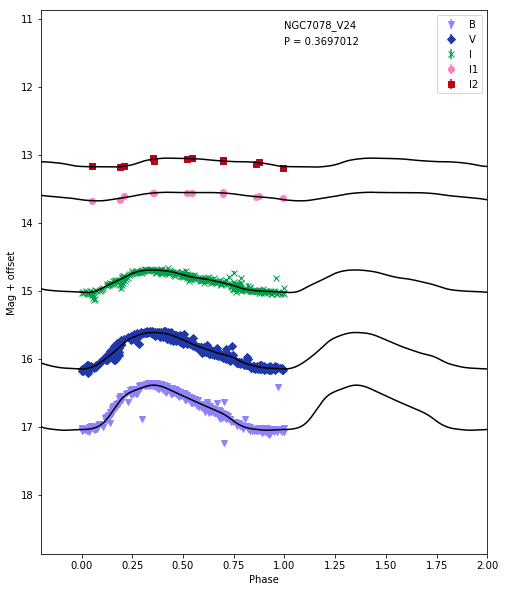

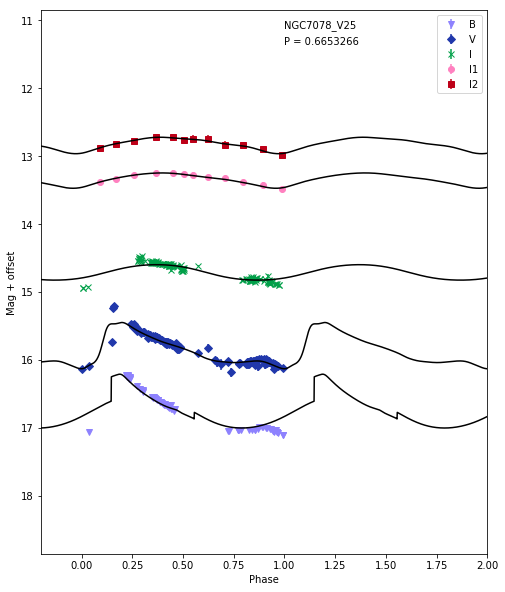

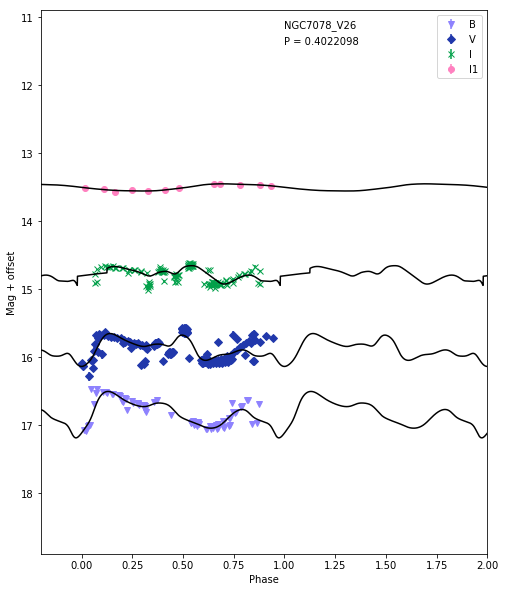

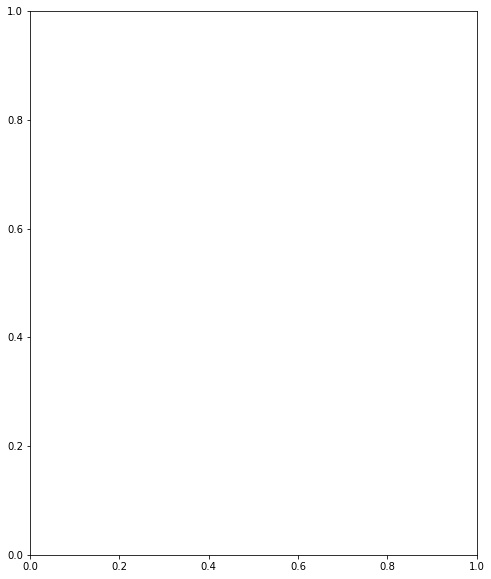

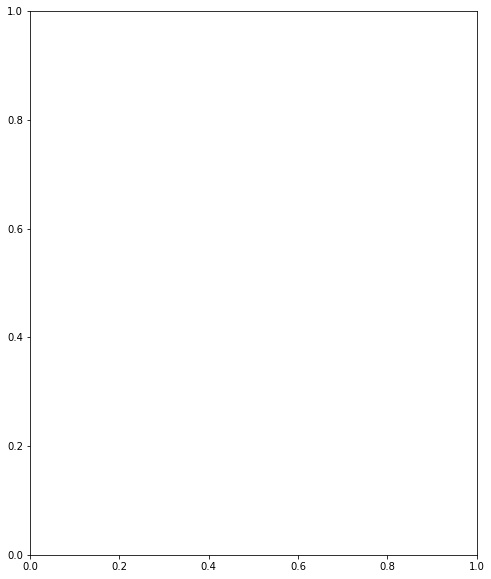

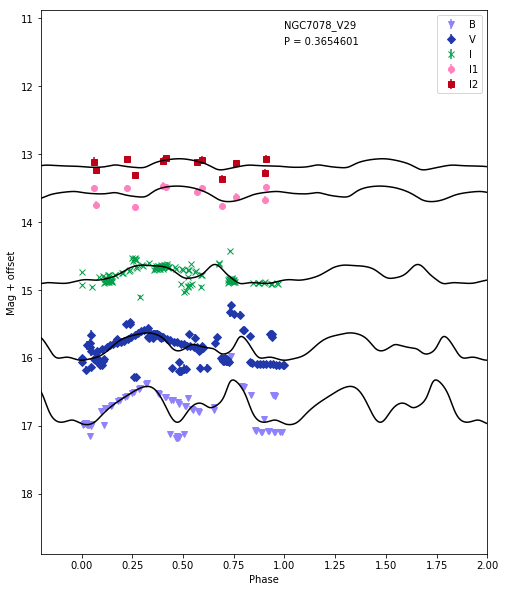

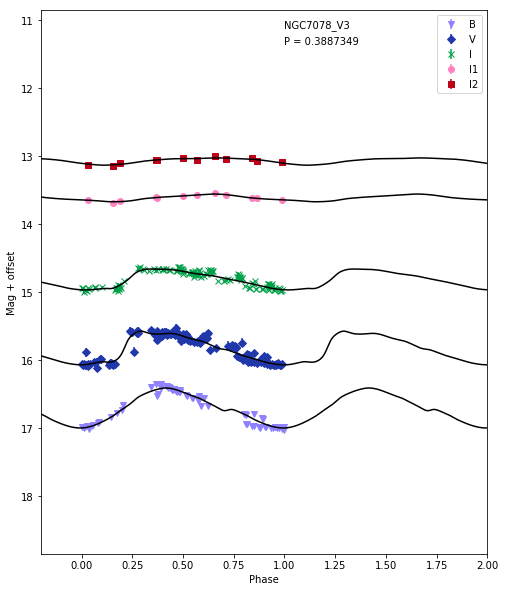

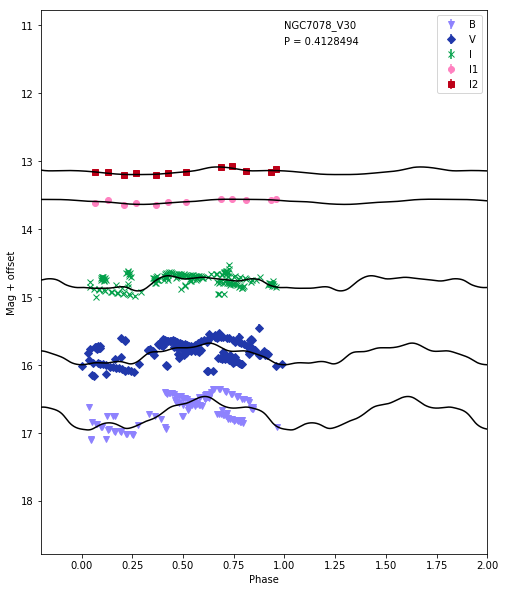

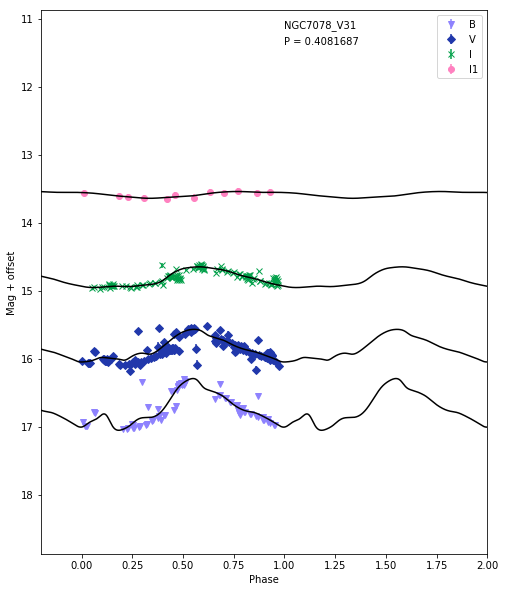

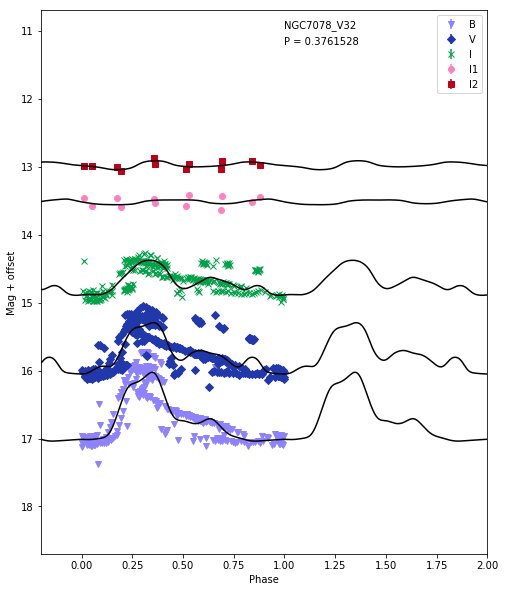

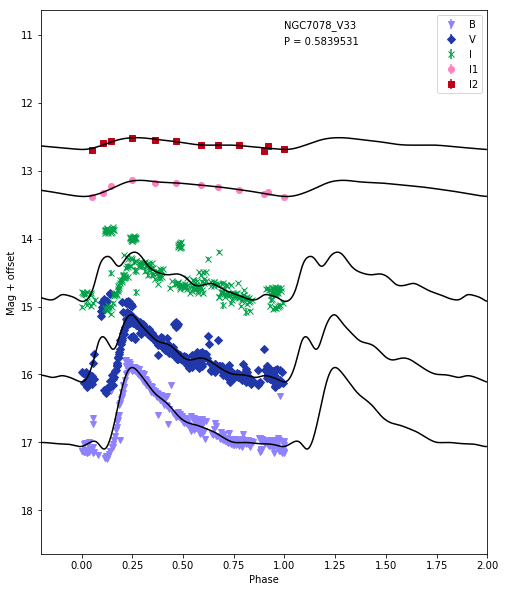

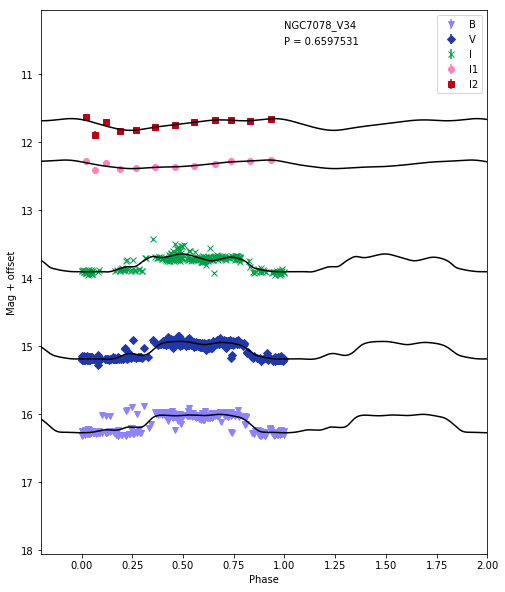

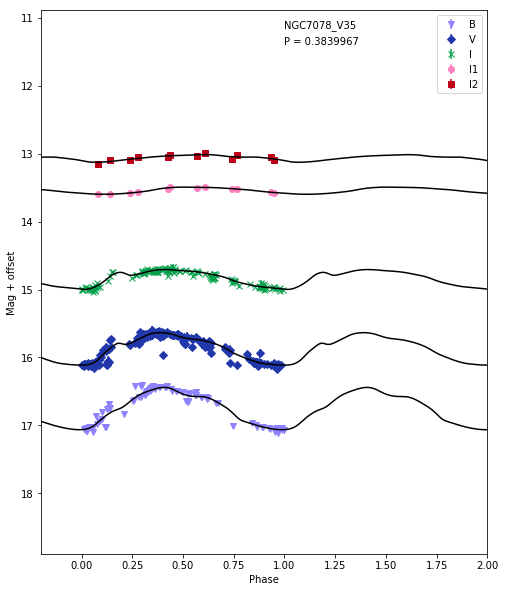

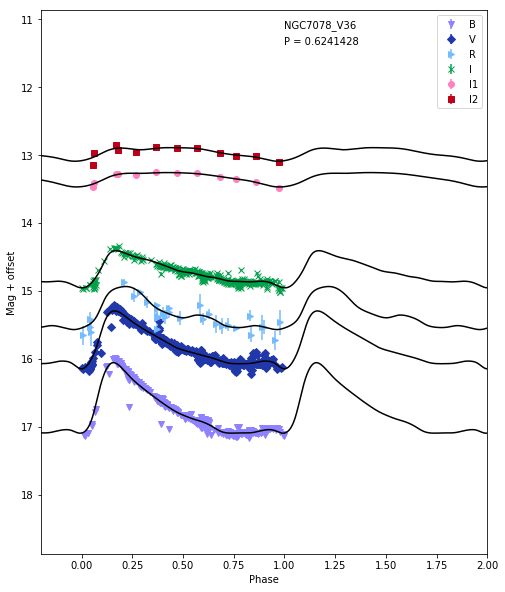

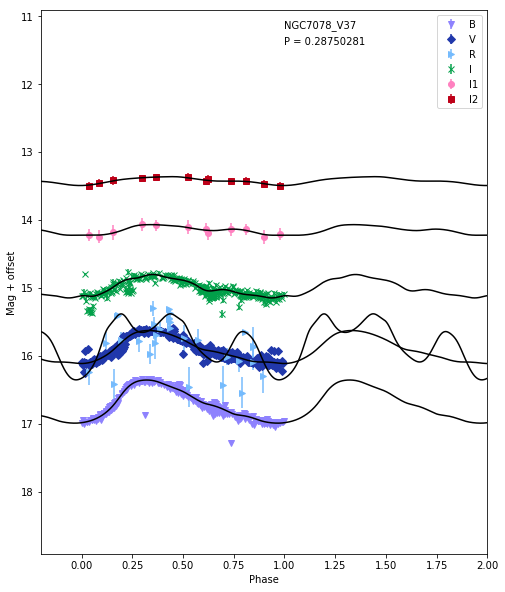

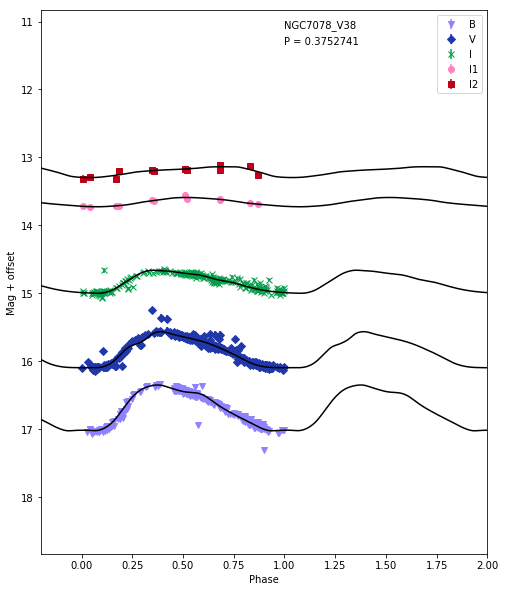

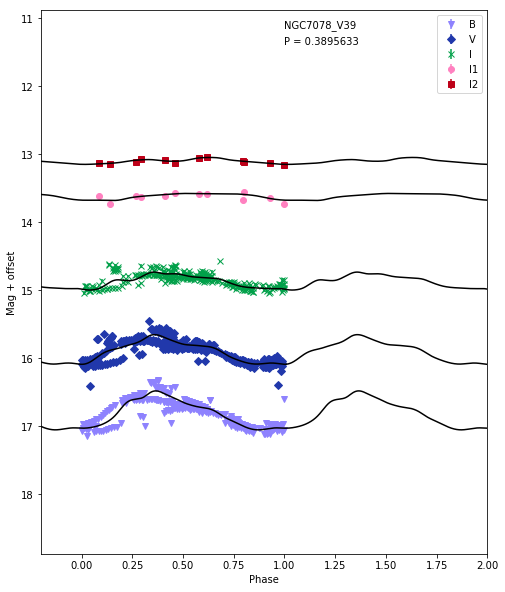

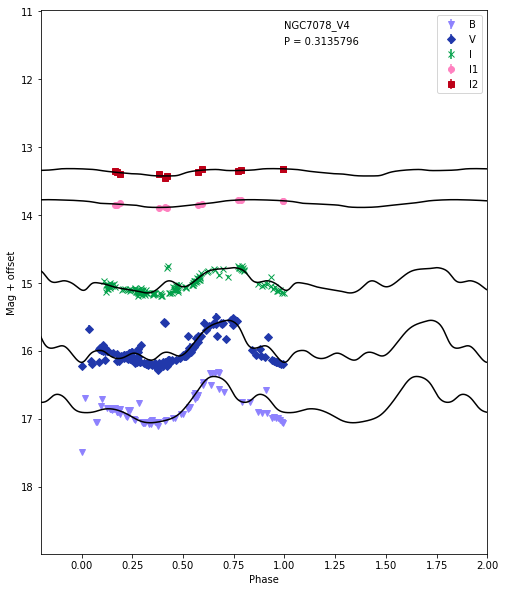

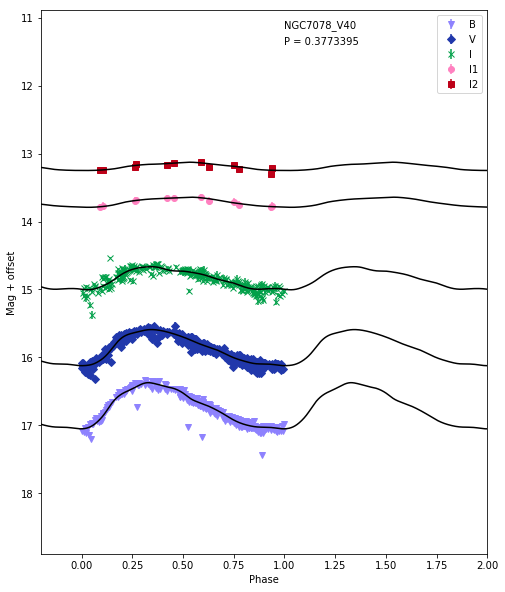

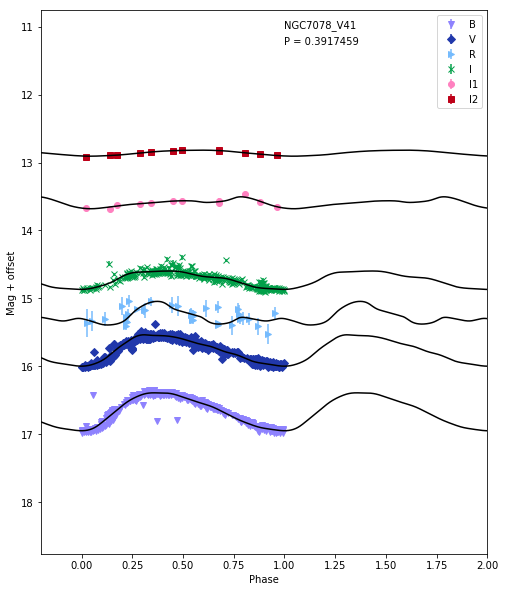

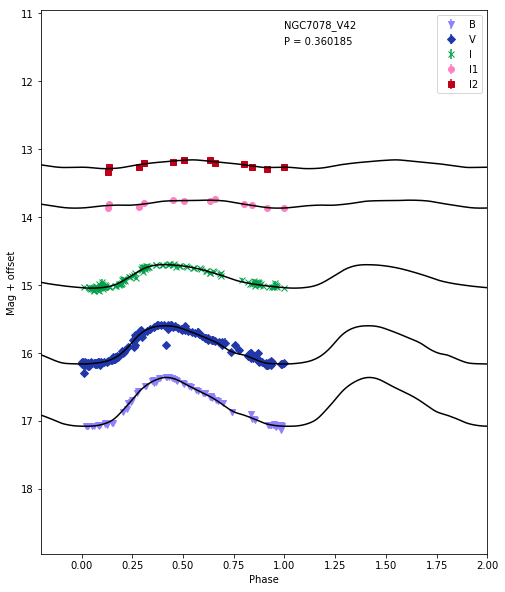

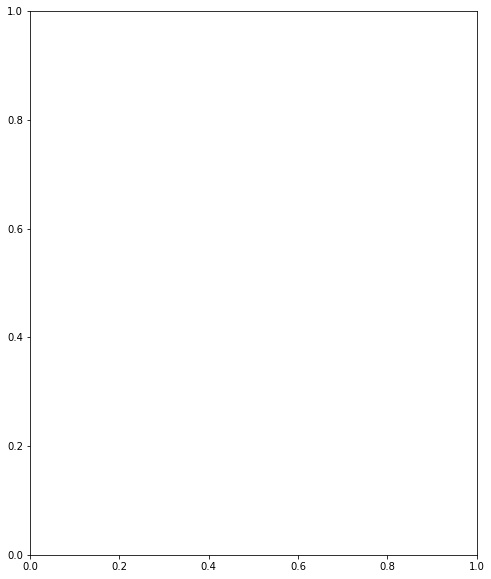

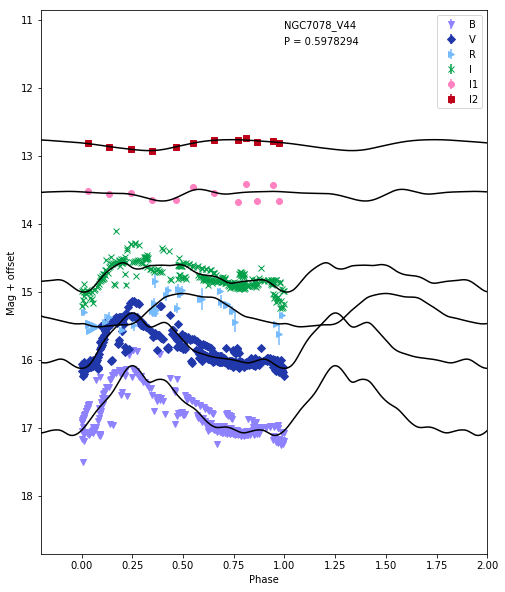

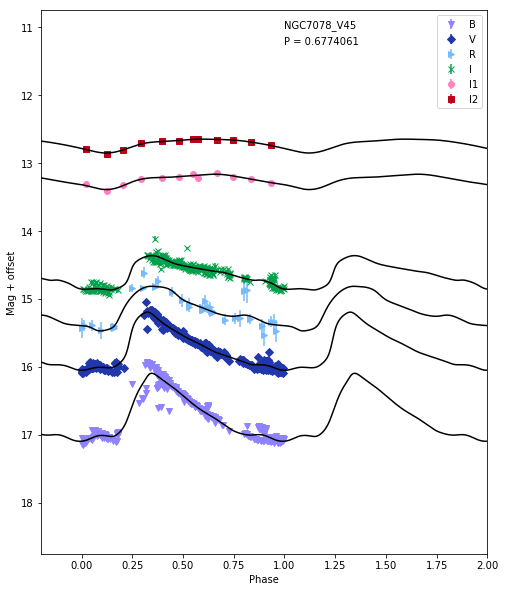

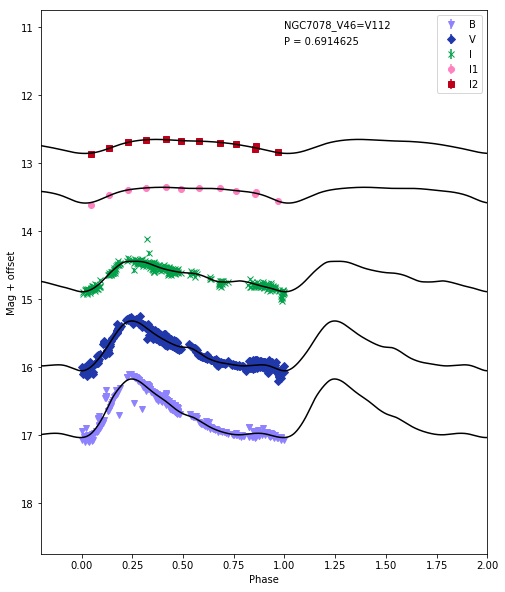

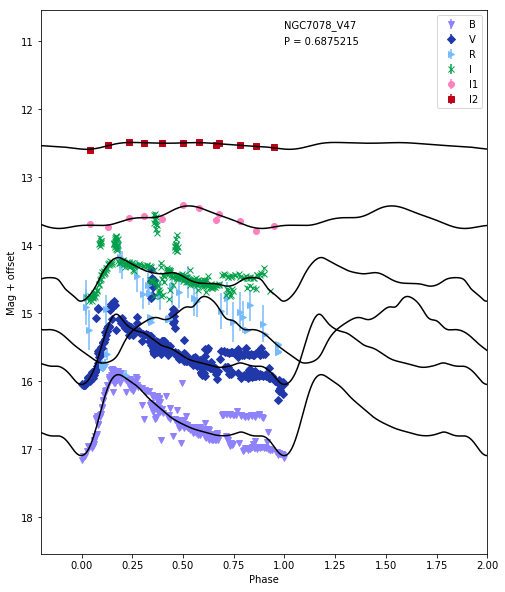

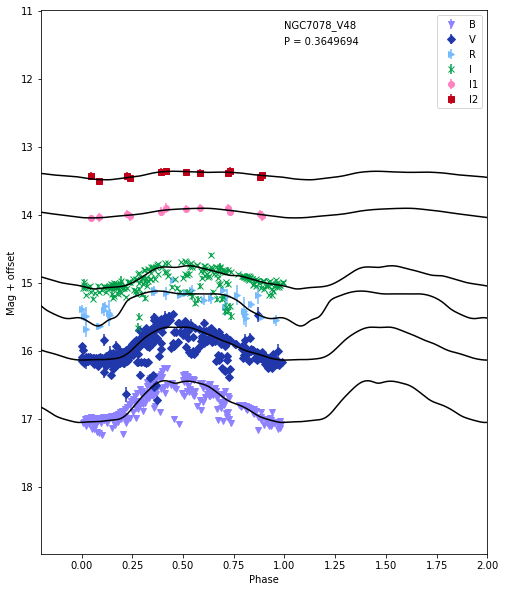

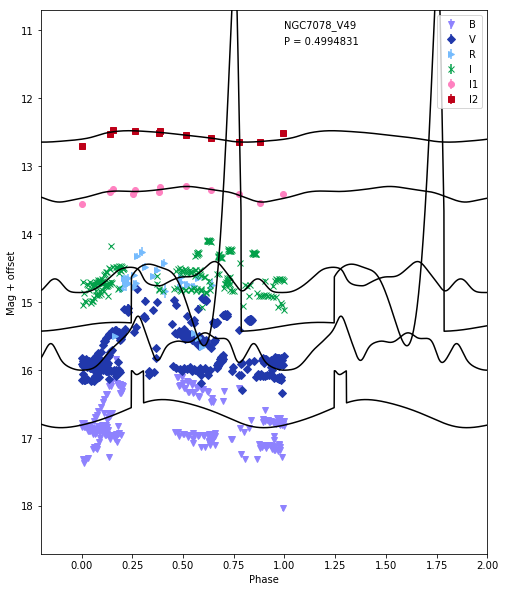

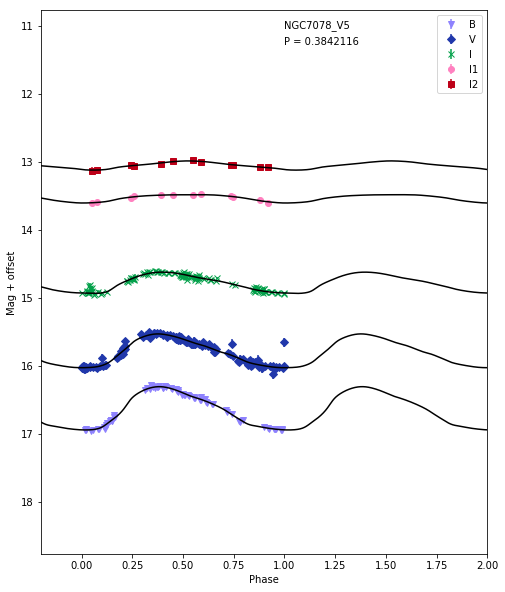

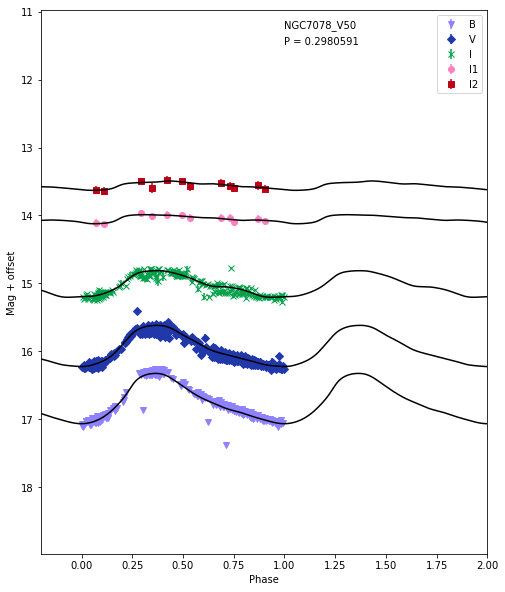

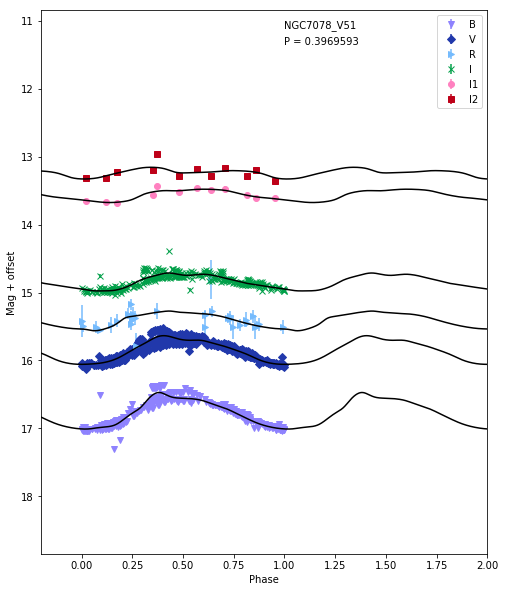

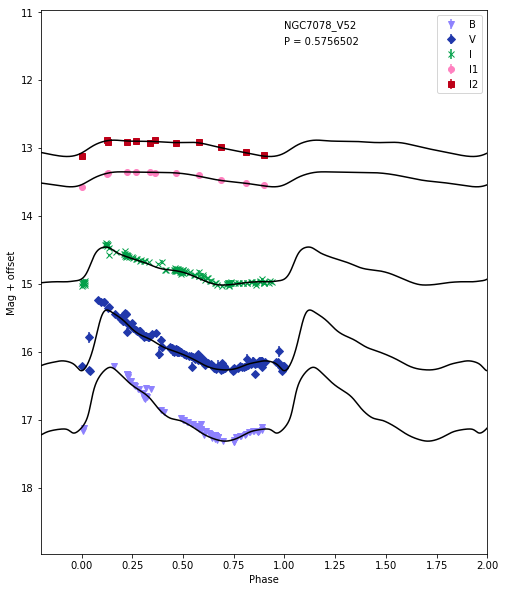

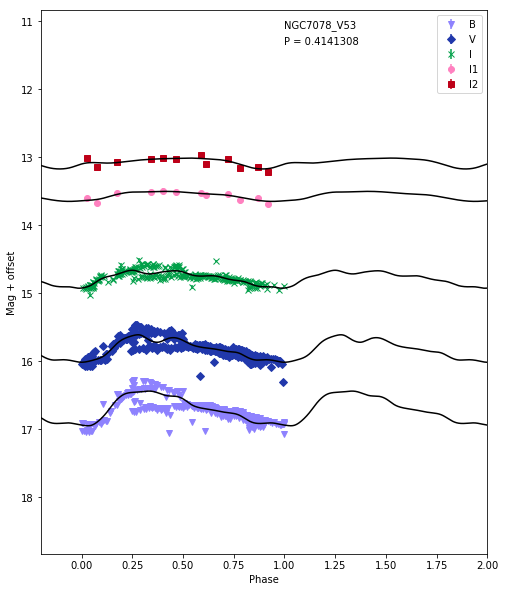

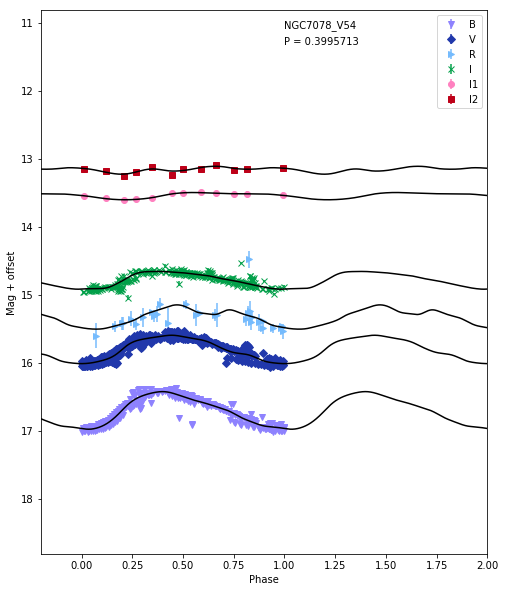

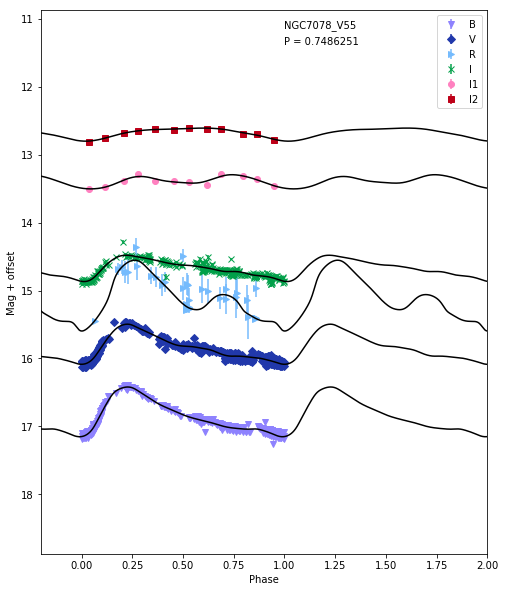

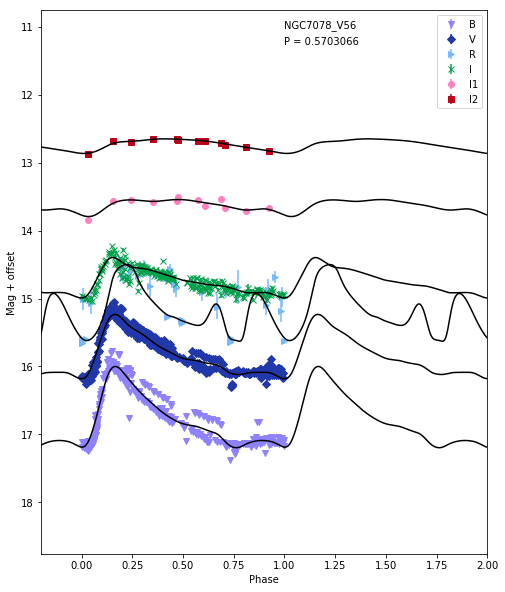

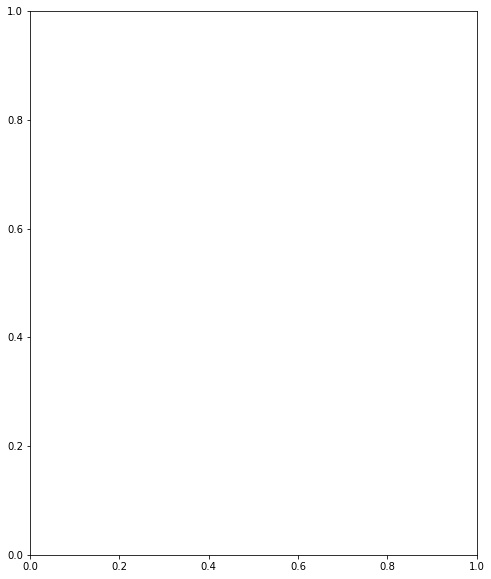

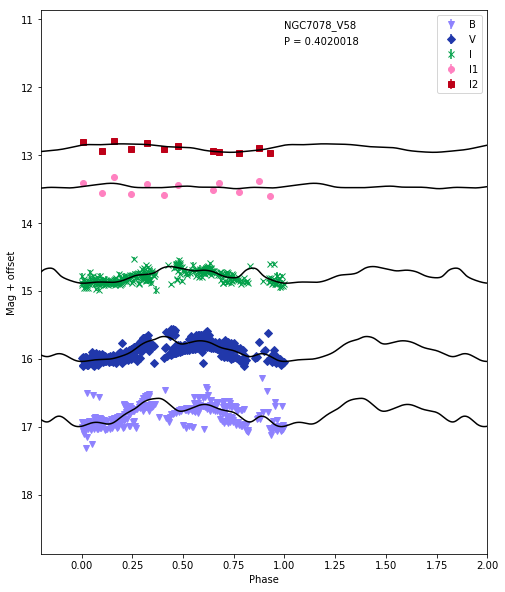

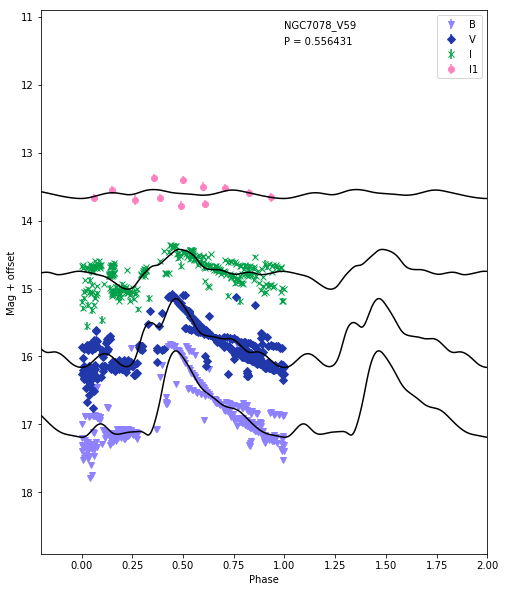

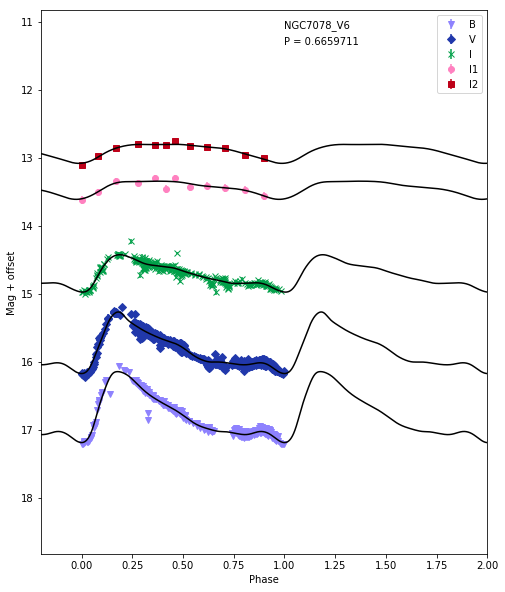

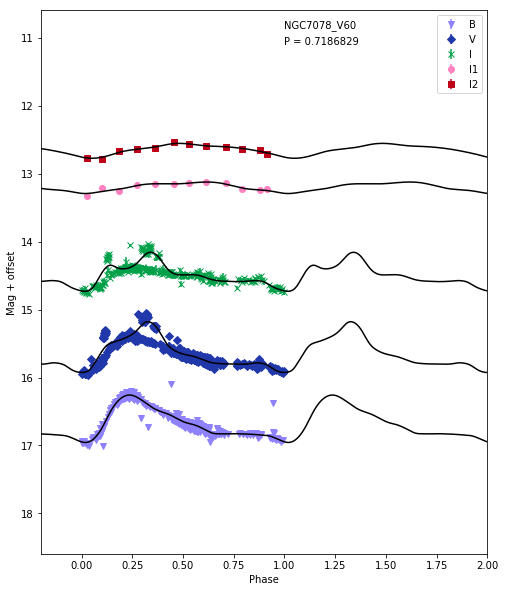

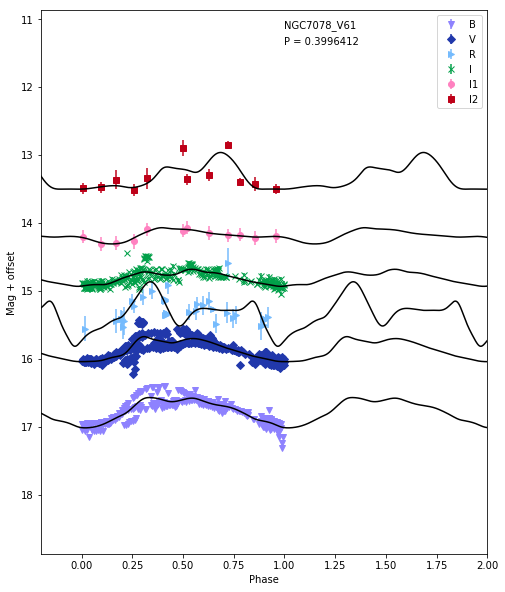

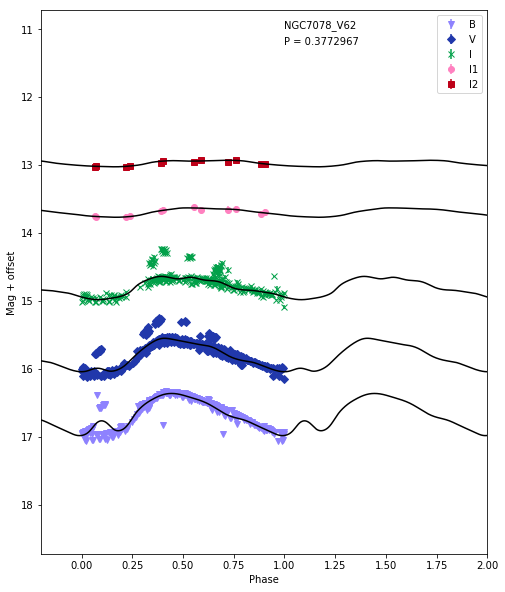

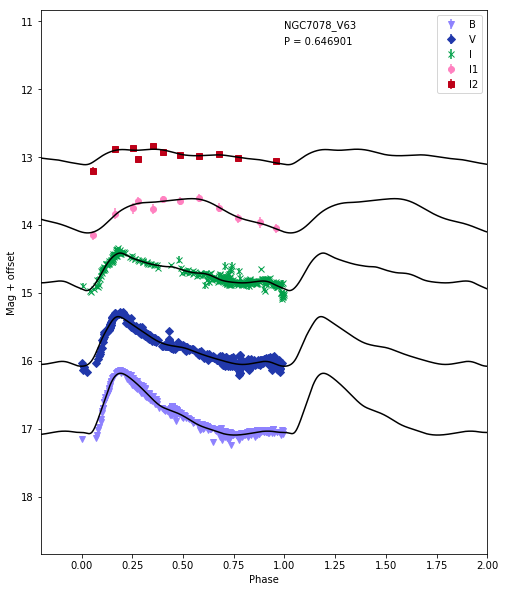

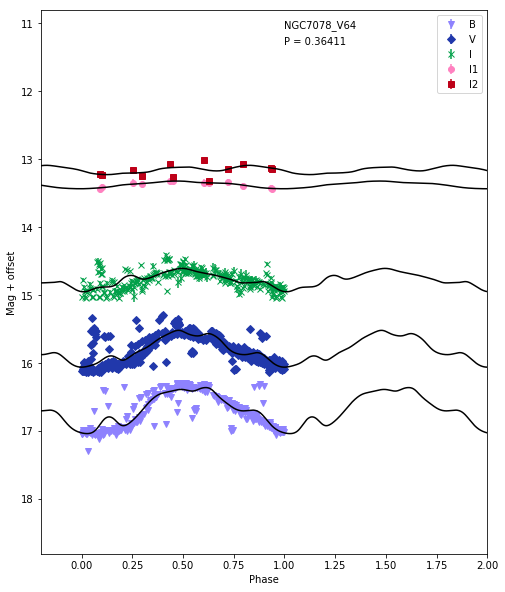

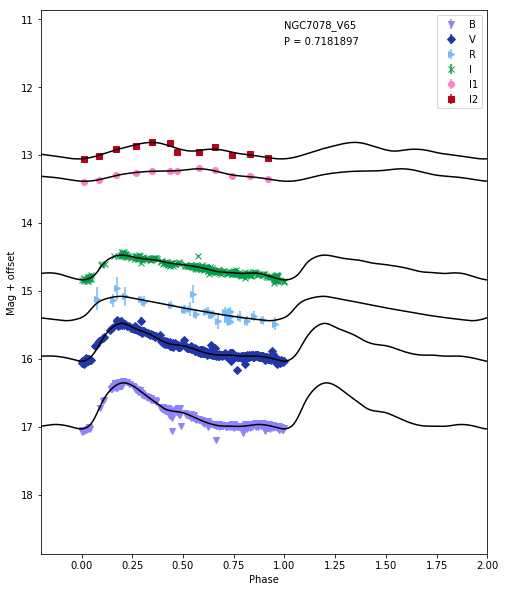

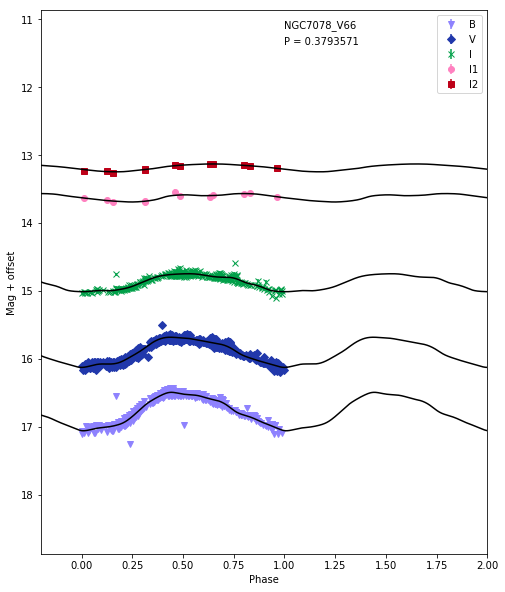

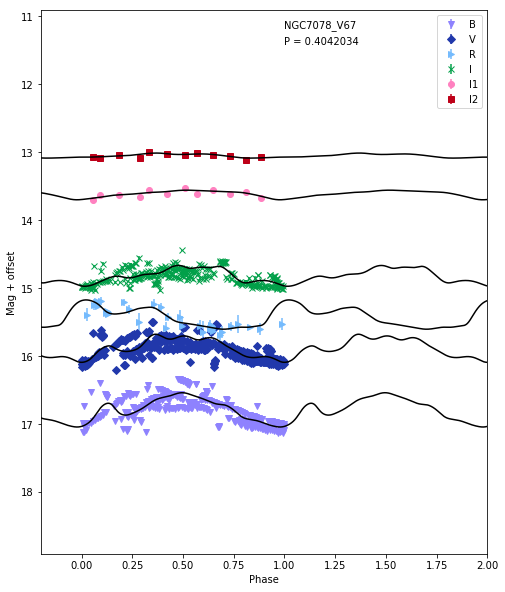

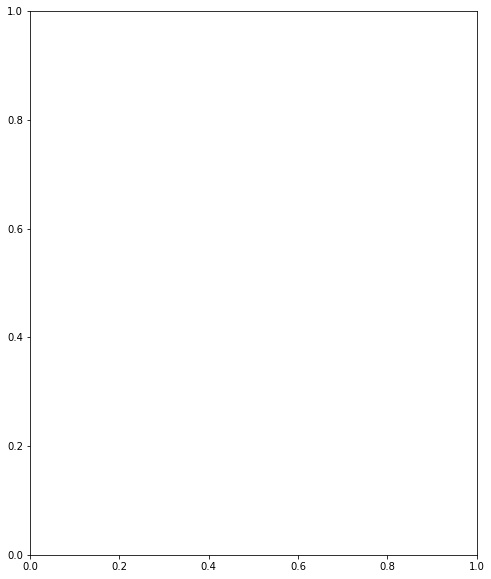

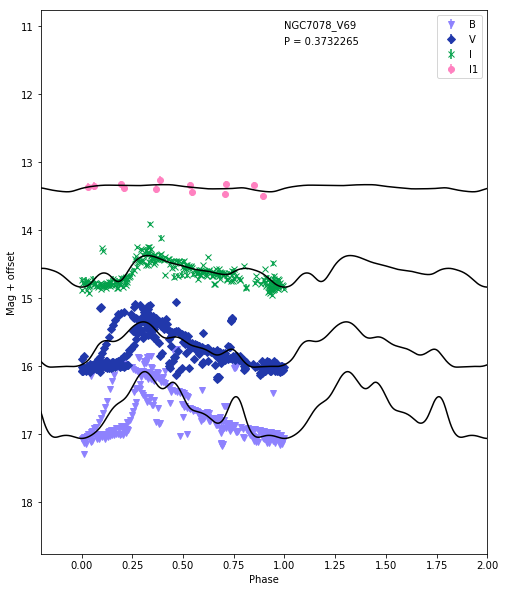

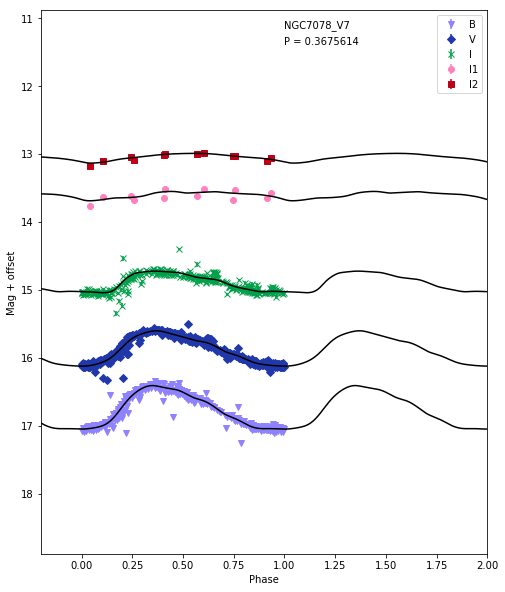

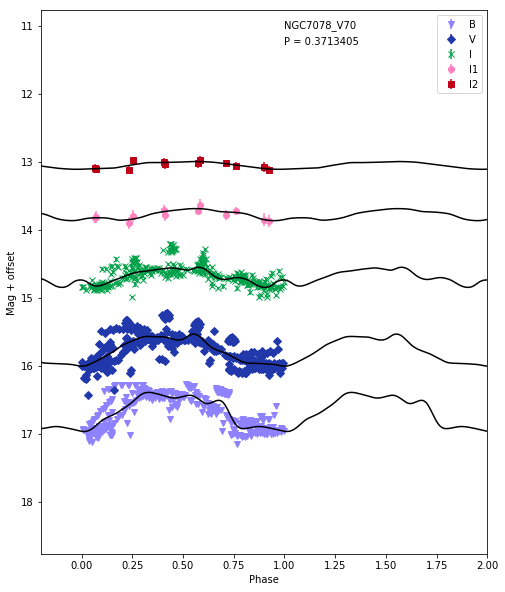

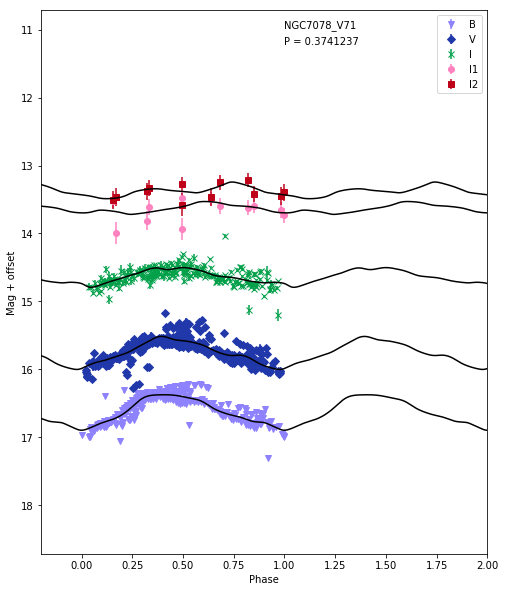

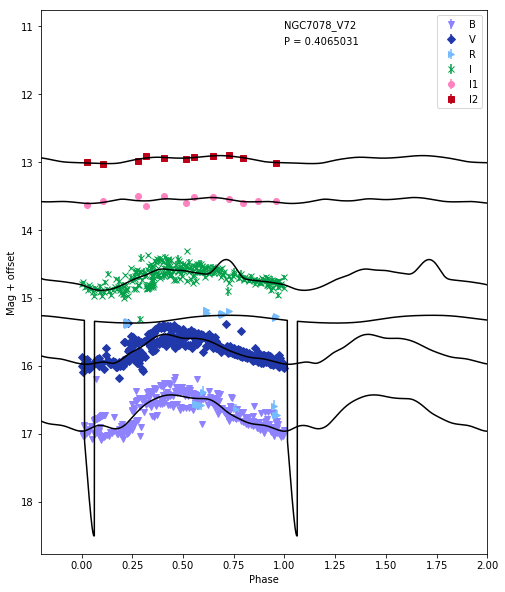

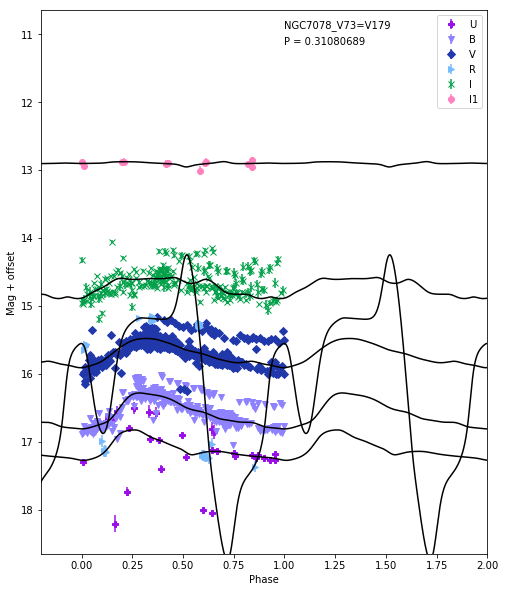

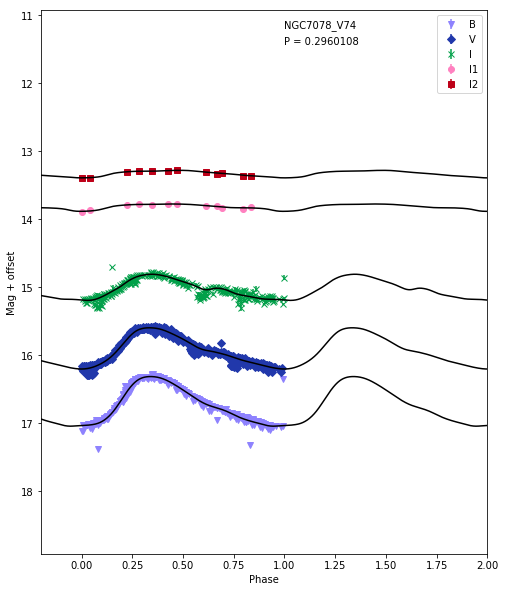

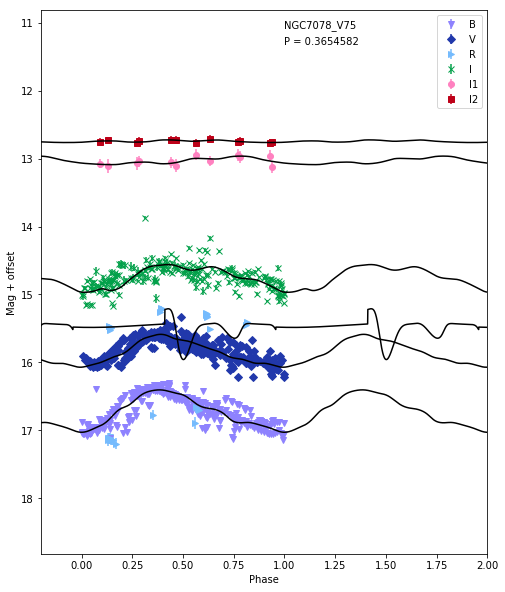

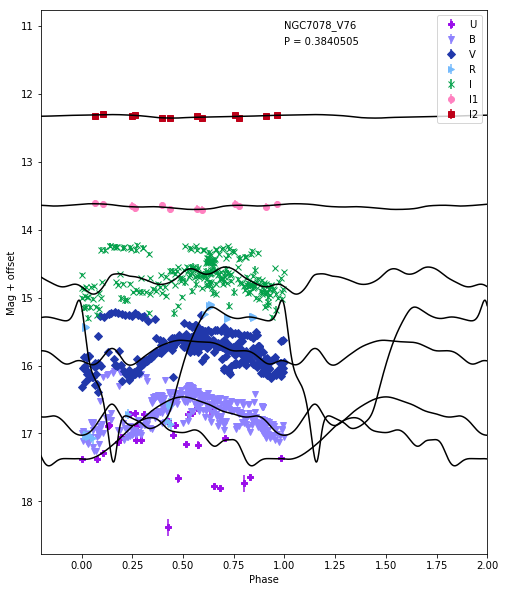

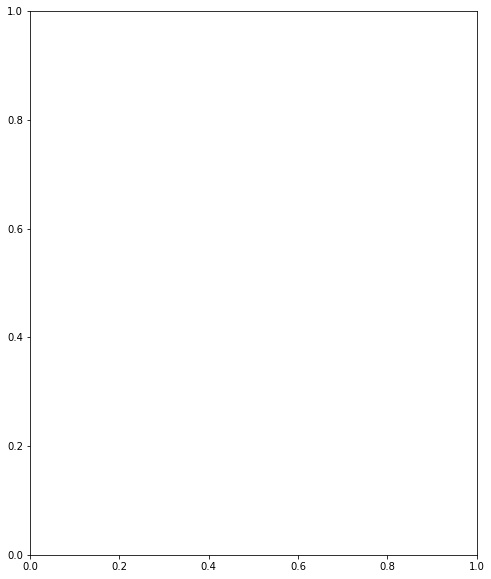

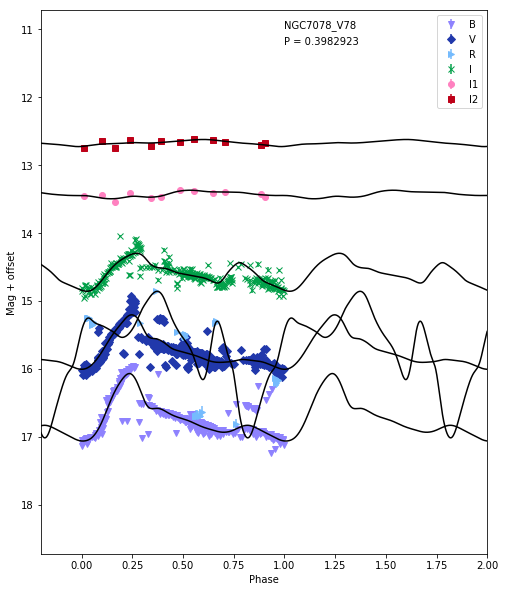

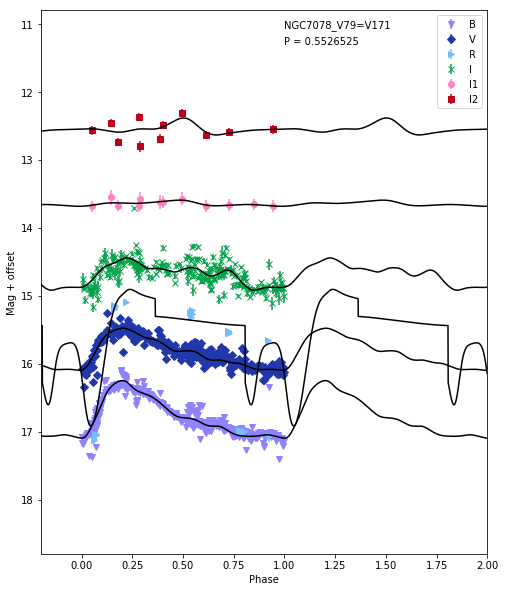

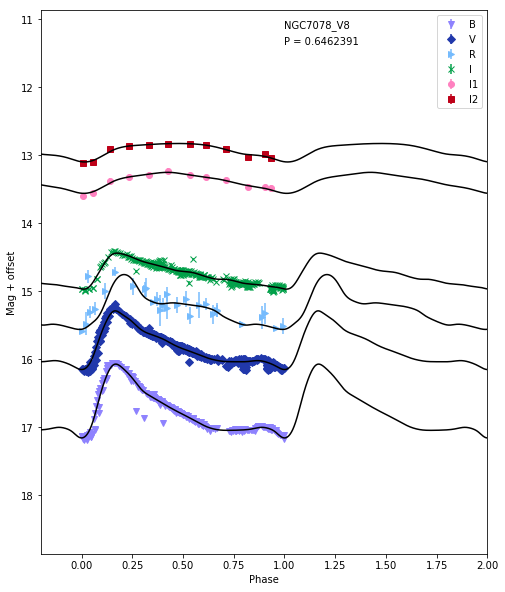

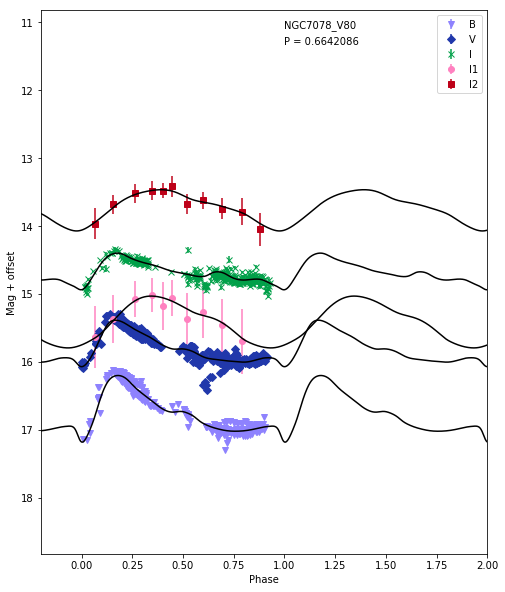

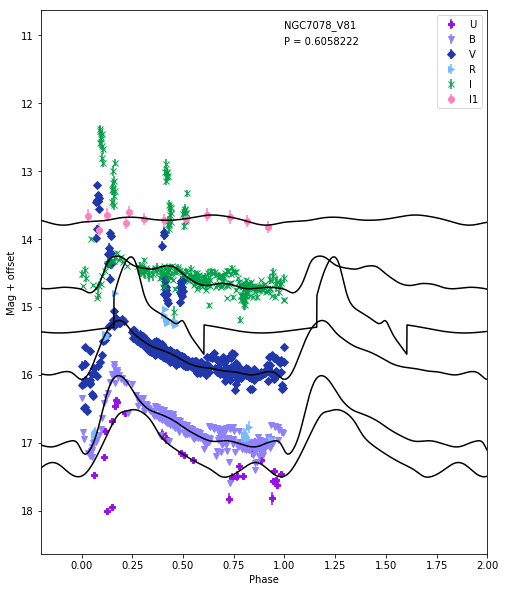

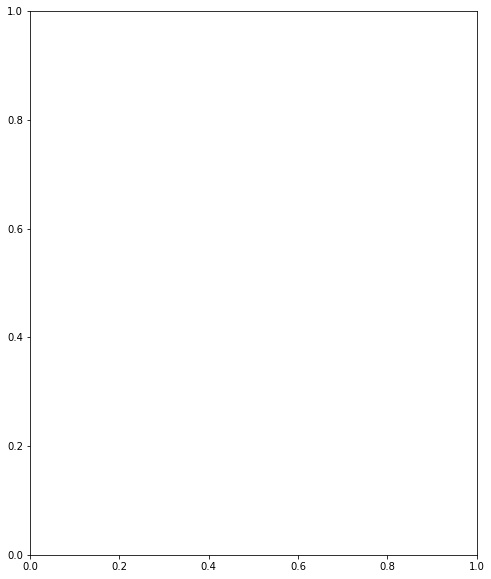

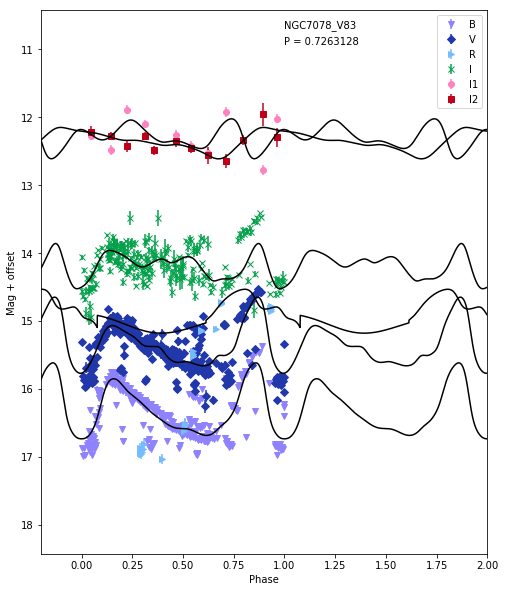

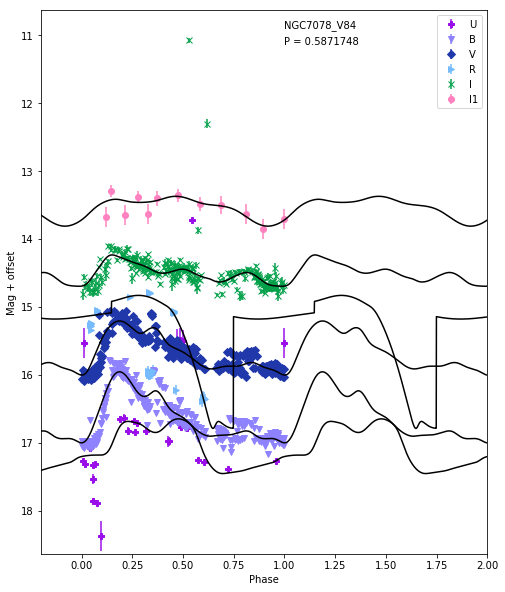

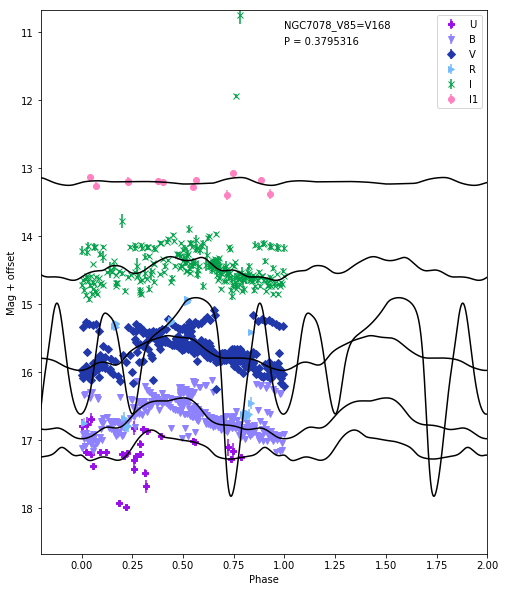

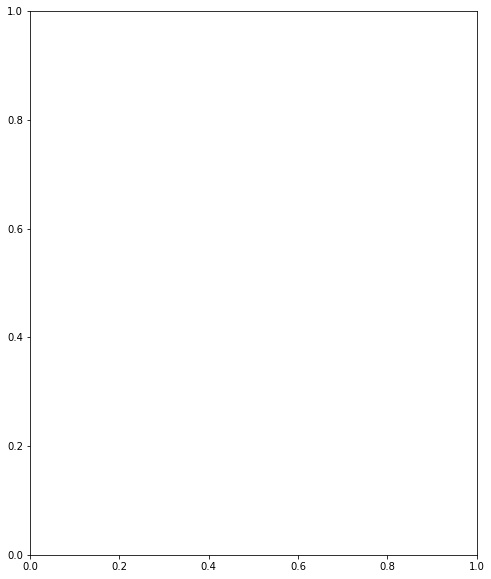

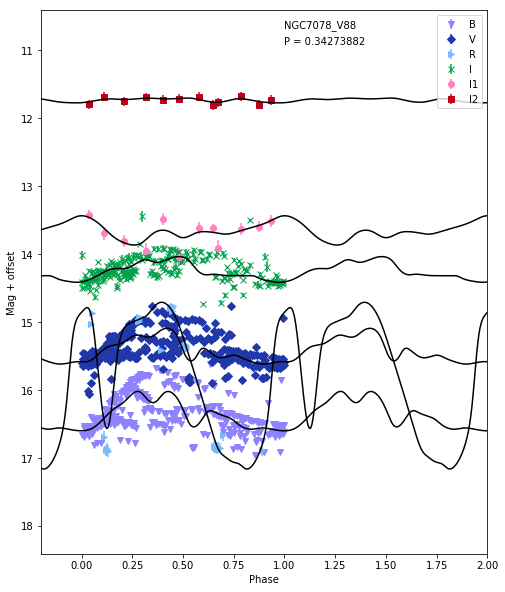

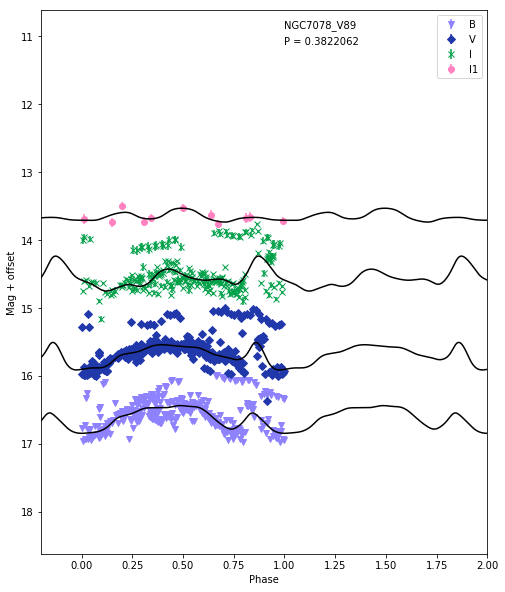

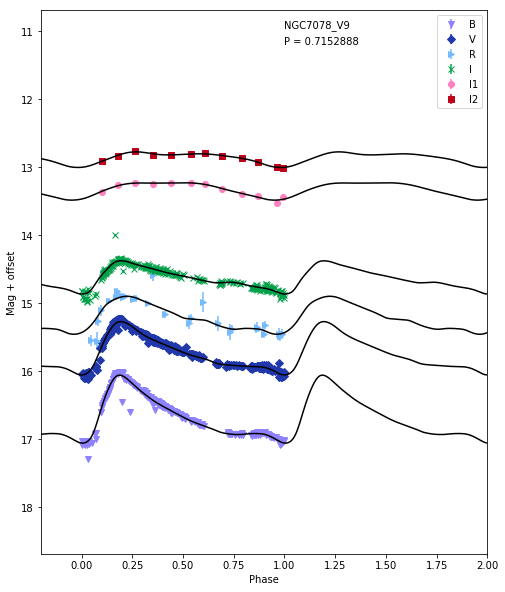

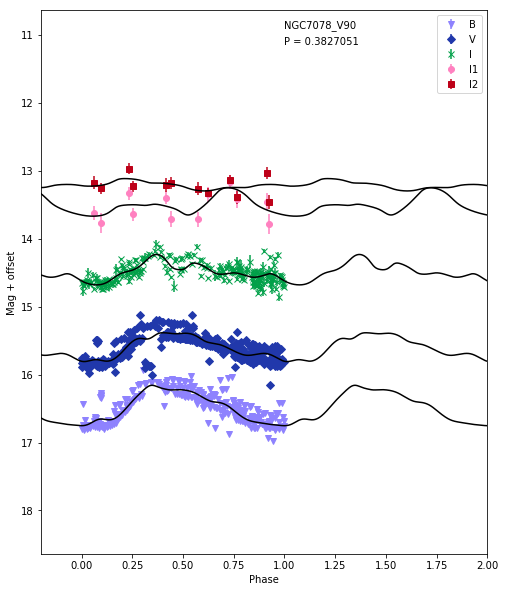

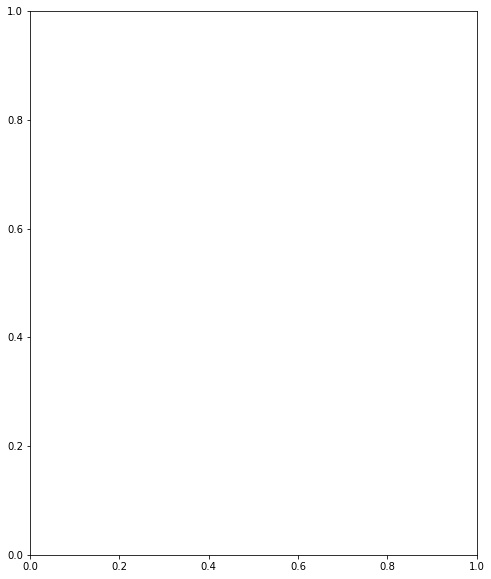

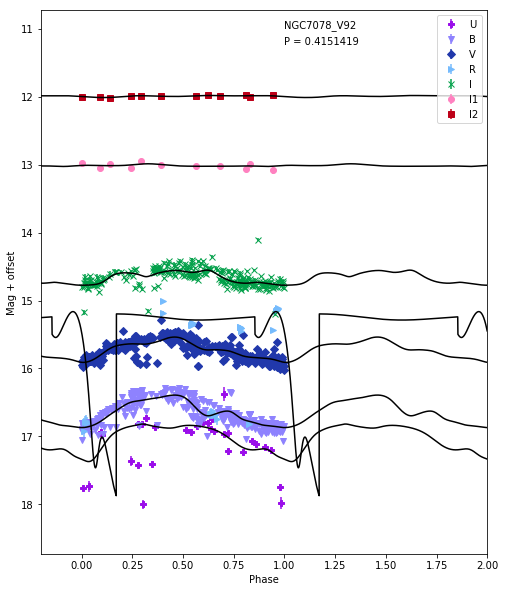

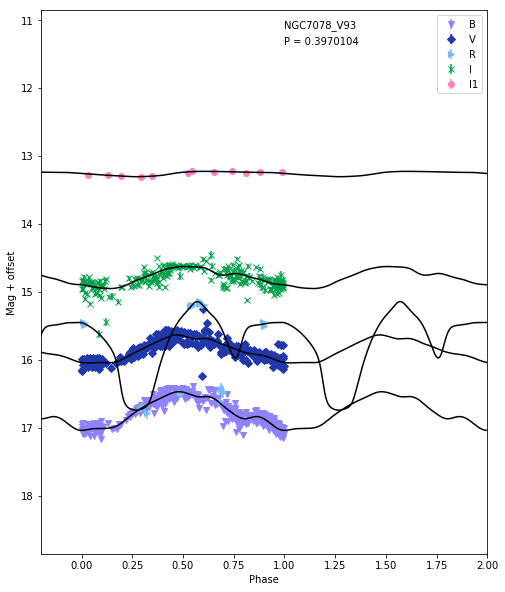

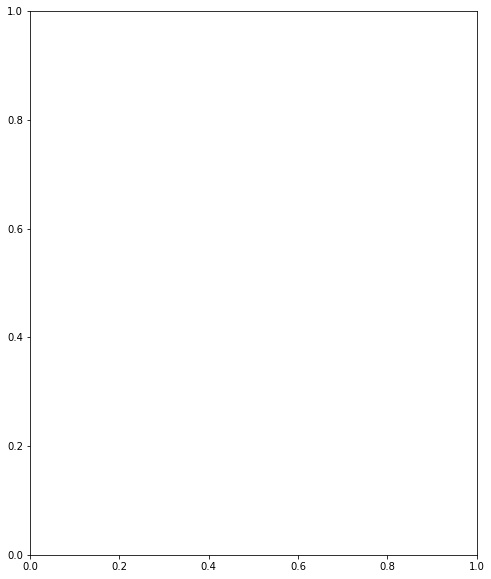

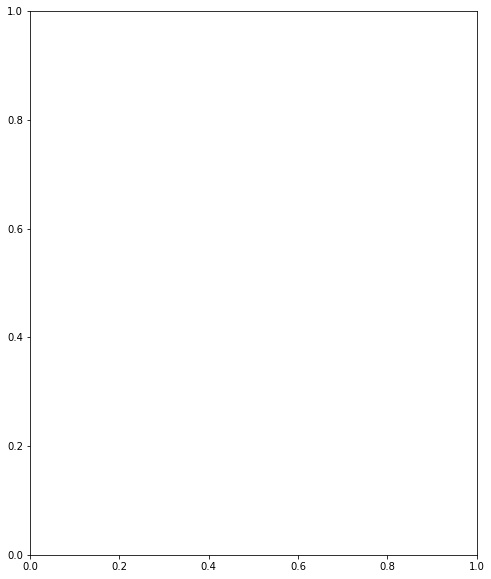

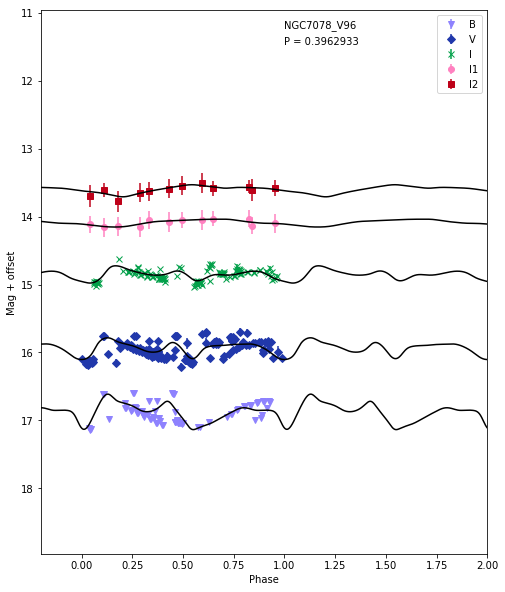

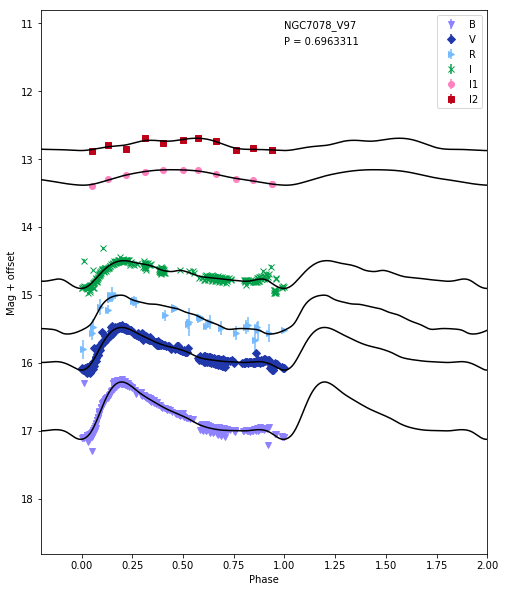

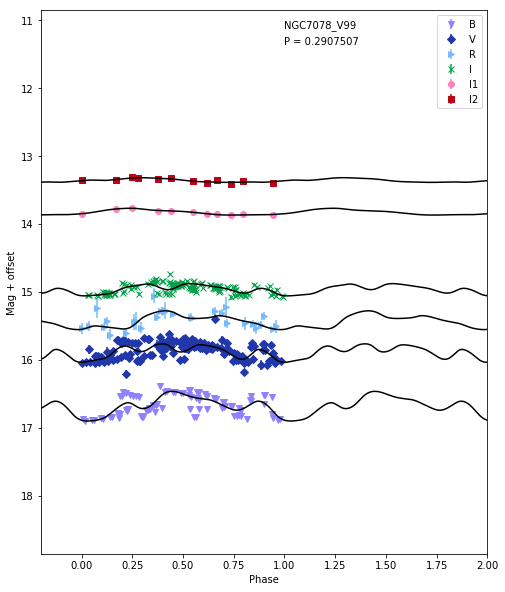

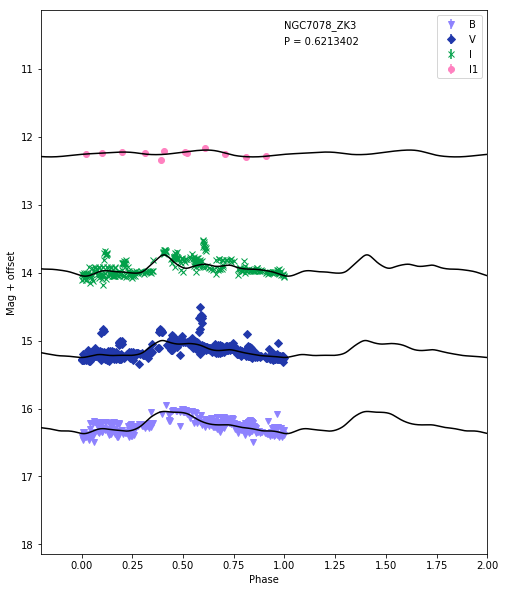

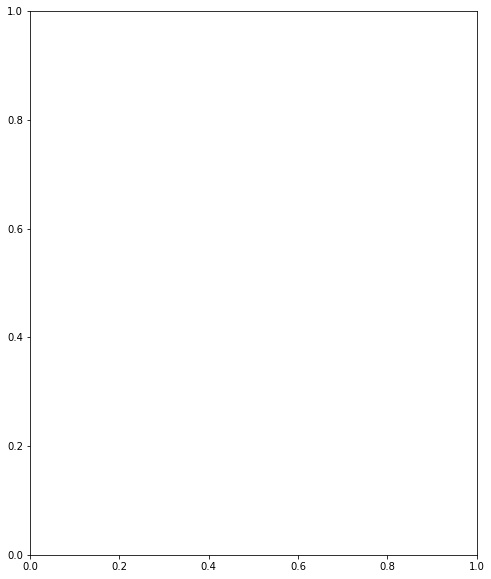

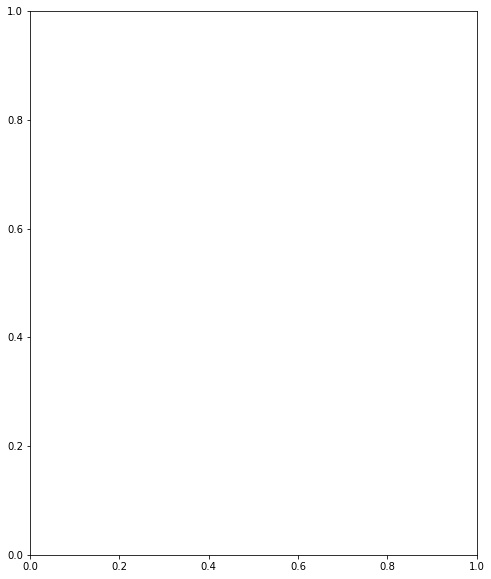

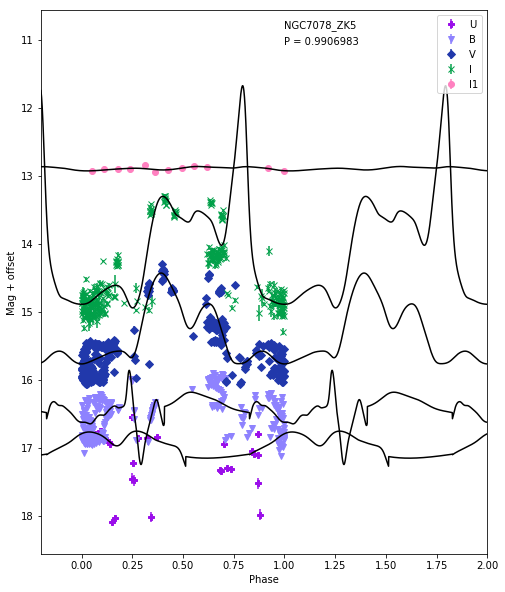

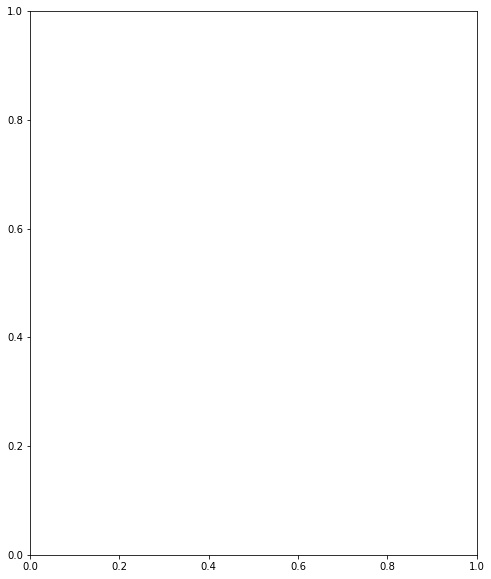

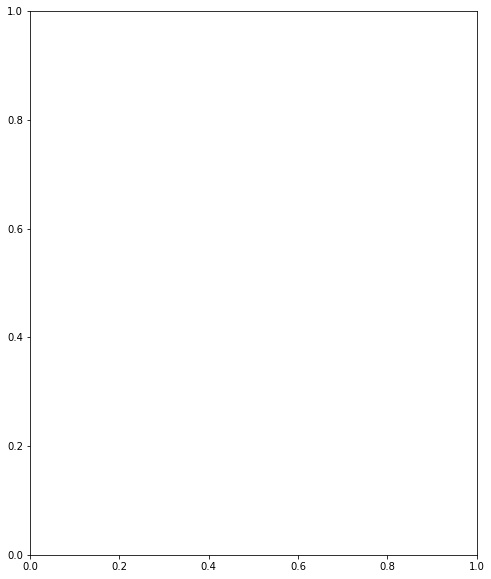

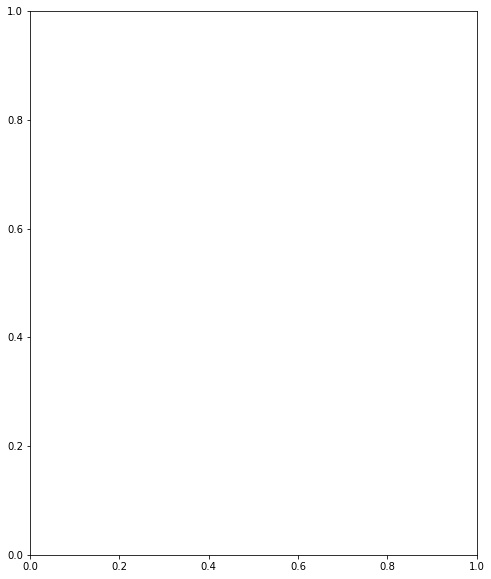

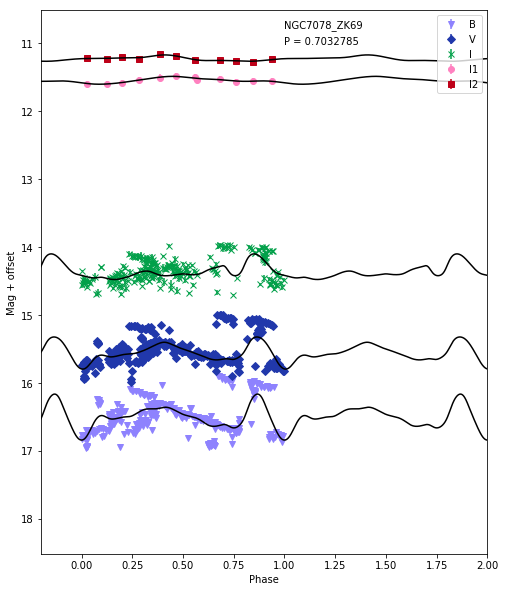

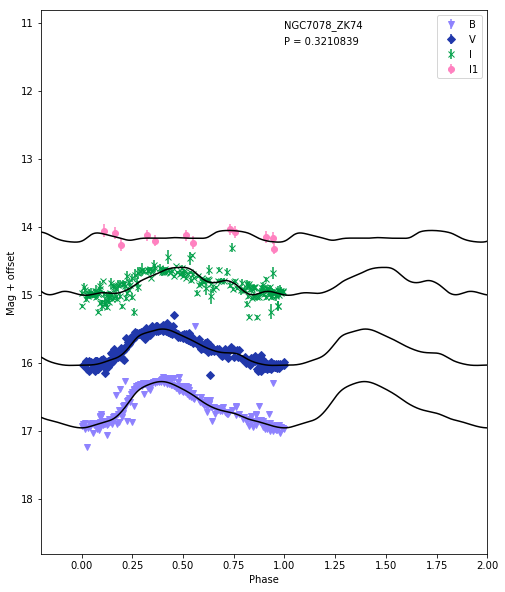

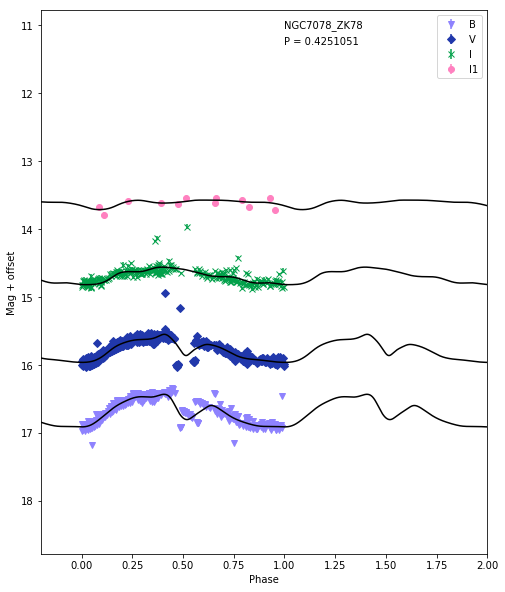

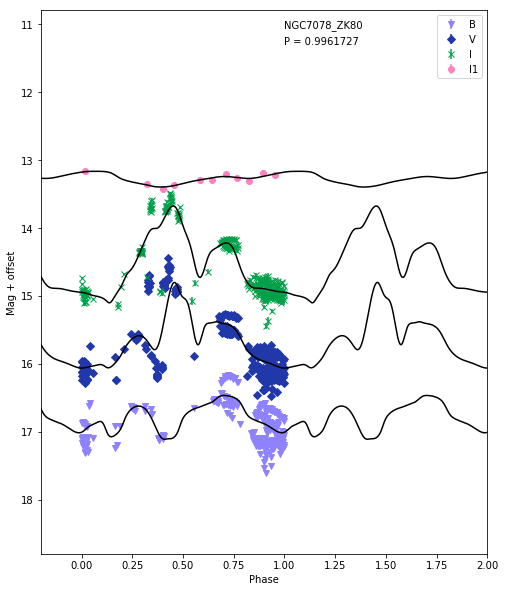

In [5]:
list_position = 0
save_dir = '/Volumes/Annie/CRRP/cluster-lcvs/'
target = 'M15'
RRL_candidates = np.loadtxt(save_dir+target+'.lst', dtype='S25')
#M4_candidates = np.loadtxt(save_dir+'M4.lst', dtype='S20')
print '{} RRL candidates.'.format(len(RRL_candidates))

if list_position == 0:
    period_file = open(save_dir+target+'-periods.txt', 'w')
    avg_file = open(save_dir+target+'-avgs.txt', 'w')
else:
    period_file = open(save_dir+target+'-periods.txt', 'a')
    avg_file = open(save_dir+target+'-avgs.txt', 'a')

period_dtype = np.dtype([('c1', 'S25'), ('c2', float), ('c3', float), ('c4', float)])
avg_dtype = np.dtype([('c1', 'S25'), ('c2', 'S2'), ('c3', float), ('c4', float), ('c5', float), ('c6', float), ('c7', float), ('c8', float)])
    
for ii, rrl in enumerate(RRL_candidates):
    if ii < list_position:
        continue
    filters, data = lcv_fitting.read_lcv(save_dir+rrl)
    V_band = data[data['filter'] == 'V']
    B_band = data[data['filter'] == 'B']
    guess_period, snr = lcv_fitting1.period_search(V_band, plot=0)
    
    period = lcv_fitting1.refine_period(V_band, guess_period, second_band=B_band, plot=0)
    rrl_name = re.sub('.lcv', '', rrl)
    
    
    #lcv_fitting1.phase_lcv(filters, data, save_dir+rrl_name, period, plot=0)
    try:
        params, t0 = lcv_fitting1.gloess_auto(data, period, rrl_name, save_dir=save_dir)
        print rrl_name, guess_period, period, t0
        data_save = np.array(zip([rrl_name], [guess_period], [period], [t0]), dtype=period_dtype)
        np.savetxt(period_file, data_save, fmt='%25s %11.9f %11.9f %9.4f')

        data_save2 = np.array(zip(np.repeat(rrl_name, 10), filters_all, np.repeat(period, 10), np.repeat(t0, 10), params['avg'], params['avg_e'], params['amp'], params['chisq']), dtype=avg_dtype)
        np.savetxt(avg_file, data_save2, fmt='%25s %2s %11.9f %9.4f %6.3f %5.3f %4.2f %10.1f')
        if ii > list_position: list_position = ii
    except:
        data_save = np.array(zip([rrl_name], [guess_period], [period], [-1]), dtype=period_dtype)
        np.savetxt(period_file, data_save, fmt='%25s %11.9f %11.9f %9.4f')
        
period_file.close()
avg_file.close()

## Refine problem periods